# Prediction of Customer Churn

We have divided our excercise in 11 steps. Main objective to predict churning of customers for a telecm company

# 1)- Importing key modules

In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For processing and maths
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt
import requests
import pickle

In [0]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
# For deep learning models
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [0]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
# we face some issues in clab environment with statsmodel. So we got to install scipy's speccific version
!pip install scipy==1.2  --user

In [0]:
# For stat models
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2)-Loading datasets

In [11]:
df_telcom =pd.read_csv('Telecom.csv', encoding="ISO-8859-1")
df_telcom.head()

,Unnamed: 0,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status
0,1,ADF1259,3805,126.83,4091.6160,1436.324929,2655.291071,81,3.624375e+03,117,KPN,0
1,2,ADF1192,2905,96.83,3179.2800,1949.967368,1229.312632,101,5.518428e+05,106,Telfort,0
2,3,ADF1501,3819,127.30,7233.1824,949.015084,6284.167316,79,2.128473e+06,94,TELE2,0
3,4,ADF1762,3643,121.43,7336.1760,1765.167079,5571.008921,121,2.180738e+04,450,Ben,1
4,5,ADF1345,3809,126.97,5390.9400,3519.060527,1871.879473,16,4.648857e+05,308,TELE2,0


In [12]:
df_telcom.shape

(1200, 12)

In [0]:
df_telcom = df_telcom.drop(['Unnamed: 0'], axis=1)

In [14]:
df_telcom.shape

(1200, 11)

In [15]:
df_fin =pd.read_csv('Finance.csv')
df_fin.head()

,Unnamed: 0,Customer.ID,Key,Value
0,1,ADF0038,PricePhone,399.181002
1,2,ADF0038,MonthlySubscriptionPrice,49.244972
2,3,ADF0038,PaidAfterPaymentDate,1.000000
3,4,ADF0039,PricePhone,4.826688
4,5,ADF0039,MonthlySubscriptionPrice,33.292264


In [0]:
df_fin.shape

(3606, 4)

In [0]:
df_fin = df_fin.drop(['Unnamed: 0'], axis=1)

In [17]:
df_fin.shape

(3606, 3)

In [18]:
df_fin['Key'].value_counts()

MonthlySubscriptionPrice    1202
PricePhone                  1202
PaidAfterPaymentDate        1202
Name: Key, dtype: int64

In [19]:
df_cust =pd.read_csv('CustServ.csv', encoding="ISO-8859-1")
df_cust.head()

,Unnamed: 0,Customer.ID,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls
0,1,ADF1259,44,Utrecht,52.090737,5.121420,Utrecht,6,11,2019-05-08,2
1,2,ADF1192,31,Hoogeveen,52.728616,6.490100,Drenthe,8,12,2019-04-16,2
2,3,ADF1501,35,Oosterhout,51.641020,4.861690,Noord-Brabant,6,8,2019-05-24,3
3,4,ADF1762,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1
4,5,ADF1345,53,Zundert,51.470702,4.662356,Noord-Brabant,7,9,2019-03-24,2


In [20]:
df_cust.shape

(1200, 11)

In [0]:
df_cust = df_cust.drop(['Unnamed: 0'], axis=1)

In [22]:
df_cust.shape

(1200, 10)

In [23]:
df_pilot =pd.read_csv('Pilot_project.csv', encoding="ISO-8859-1")
df_pilot.head()

,Customer.ID,Total.Unique.Calls,Total.Call.centre.complaint.calls,Previous.provider,Customer.Age,Customer.Municipality,PricePhone,MonthlySubscriptionPrice,LoginsSite.Last.Month,LoginsSite.Last.6Months,PaidAfterPaymentDate,Years.customer,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Minutes.offnet,Minutes.onnet,Latitude,Longitude,Province,EndSubscription
0,ADF1345,308,2,TELE2,53,Zundert,267.980610,41.250999,7,9,5,3809,126.97,5390.9400,16,4.648857e+05,1871.879473,3519.060527,51.470702,4.662356,Noord-Brabant,24-3-2019
1,ADF1658,27,1,KPN,76,Eemsmond,305.727018,18.336615,7,16,3,165,5.50,1220.2872,7,3.967471e+05,997.283408,223.003792,53.400344,6.648410,Groningen,24-4-2019
2,ADF0063,138,1,Vodafone,18,Krimpenerwaard,266.660924,45.172294,6,11,2,727,24.23,4395.3528,8,2.528750e+02,1044.632718,3350.720082,51.982222,4.781667,Zuid-Holland,18-6-2019
3,ADF0047,79,2,T-Mobile,46,Rijssen-Holten,489.103383,36.975923,5,12,2,4082,136.07,1573.6800,0,8.673800e+00,476.437555,1097.242445,52.292506,6.439999,Overijssel,25-1-2019
4,ADF1348,660,1,Telfort,18,Zoeterwoude,134.543776,32.380655,5,12,1,1417,47.23,5419.6200,0,2.166780e+06,4331.800248,1087.819752,52.120830,4.516570,Zuid-Holland,8-5-2019


In [24]:
df_pilot.shape

(200, 22)

In [25]:
print(df_pilot.columns)

Index(['Customer.ID', 'Total.Unique.Calls',
       'Total.Call.centre.complaint.calls', 'Previous.provider',
       'Customer.Age', 'Customer.Municipality', 'PricePhone',
       'MonthlySubscriptionPrice', 'LoginsSite.Last.Month',
       'LoginsSite.Last.6Months', 'PaidAfterPaymentDate', 'Years.customer',
       'Months.customer', 'Minutes.in.2018', 'Number.of.SMS', 'KBs.used',
       'Minutes.offnet', 'Minutes.onnet', 'Latitude', 'Longitude', 'Province',
       'EndSubscription'],
      dtype='object')


In [0]:
# for later submission step
cust_id=df_pilot["Customer.ID"]

In [27]:
print(cust_id[:3])

0    ADF1345
1    ADF1658
2    ADF0063
Name: Customer.ID, dtype: object


# 3)- Data Exploration 

starting from telcom data file

In [28]:
print(df_telcom.columns)

Index(['Customer.ID', 'Years.customer', 'Months.customer', 'Minutes.in.2018',
       'Minutes.onnet', 'Minutes.offnet', 'Number.of.SMS', 'KBs.used',
       'Total.Unique.Calls', 'Previous.provider', 'Churn.Status'],
      dtype='object')


In [29]:
print(df_cust.columns)

Index(['Customer.ID', 'Customer.Age', 'Customer.Municipality', 'Latitude',
       'Longitude', 'Province', 'LoginsSite.Last.Month',
       'LoginsSite.Last.6Months', 'EndSubscription',
       'Total.Call.centre.complaint.calls'],
      dtype='object')


### 3.1)- Joining dataframe having same columns.

We have one main dataset i.e df_telecom. We have other datasets that are called relational dataset. They contain useful information about data, features and context of our inferencial and statistical analysis. Hence, we need to combine to them to see how they make meaning for us. 

I ll borrow methods(join, concat and merge) from SQL . Thankfully , pandas provides option to apply them without using sqlite or any other data-management tool.

In [0]:
# combining customer related dataset and telecom datatset
result = pd.concat([df_telcom, df_cust], axis=1, join_axes=[df_cust.index])

In [31]:
result.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.ID,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,ADF1259,44,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,ADF1192,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2


In [32]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.ID                          1200 non-null object
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude             

In [33]:
result.shape

(1200, 21)

In [0]:
# our point of reference for these merging will always be customer.id
result2 = pd.merge(df_telcom, df_cust, on='Customer.ID')

In [35]:
result2.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2


In [36]:
result2.shape

(1200, 20)

In [37]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 20 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude                            1200 non-null float64
Province             

In [38]:
# to see common features in two dataset
set(result2.columns).intersection(set(df_pilot.columns))

{'Customer.Age',
 'Customer.ID',
 'Customer.Municipality',
 'EndSubscription',
 'KBs.used',
 'Latitude',
 'LoginsSite.Last.6Months',
 'LoginsSite.Last.Month',
 'Longitude',
 'Minutes.in.2018',
 'Minutes.offnet',
 'Minutes.onnet',
 'Months.customer',
 'Number.of.SMS',
 'Previous.provider',
 'Province',
 'Total.Call.centre.complaint.calls',
 'Total.Unique.Calls',
 'Years.customer'}

In [39]:
set(df_fin.columns).intersection(set(df_pilot.columns))

{'Customer.ID'}

In [40]:
df_fin.head(2)

,Customer.ID,Key,Value
0,ADF0038,PricePhone,399.181002
1,ADF0038,MonthlySubscriptionPrice,49.244972


### checking Finance dataset & joining required features

In [41]:
df_fin.Key.value_counts()

MonthlySubscriptionPrice    1202
PricePhone                  1202
PaidAfterPaymentDate        1202
Name: Key, dtype: int64

**These three features are important and they also are in our pilot dataset. So, we can imagine importance of them for data collectors. Let's add them to our main dataset.**

In [0]:
# check three main categories and combine them 
df_month_sub_price=df_fin[df_fin.Key=="MonthlySubscriptionPrice"]
df_paid_after=df_fin[df_fin.Key=="PaidAfterPaymentDate"]
df_price=df_fin[df_fin.Key=="PricePhone"]

In [43]:
df_month_sub_price.rename(columns={'Customer.ID':'Customer.ID',
                          'Key':'Name_of_package',
                          'Value':'MonthlySubscriptionPrice'}, 
                 inplace=True)
df_month_sub_price=df_month_sub_price.drop(['Name_of_package'], axis=1)
df_month_sub_price.head(2)

,Customer.ID,MonthlySubscriptionPrice
1,ADF0038,49.244972
4,ADF0039,33.292264


In [44]:
df_paid_after.rename(columns={'Customer.ID':'Customer.ID',
                          'Key':'Name_of_package',
                          'Value':'PaidAfterPaymentDate'}, 
                 inplace=True)
df_paid_after=df_paid_after.drop(['Name_of_package'], axis=1)
df_paid_after.head(2)

,Customer.ID,PaidAfterPaymentDate
2,ADF0038,1.0
5,ADF0039,2.0


In [45]:
df_price.rename(columns={'Customer.ID':'Customer.ID',
                          'Key':'Name_of_package',
                          'Value':'PricePhone'}, 
                 inplace=True)
df_price=df_price.drop(['Name_of_package'], axis=1)
df_price.head(3)

,Customer.ID,PricePhone
0,ADF0038,399.181002
3,ADF0039,4.826688
6,ADF0040,300.168859


### Merging all three dataset now with our main dataset.

In [0]:
df_merge = pd.merge(result2, df_month_sub_price, on='Customer.ID')

In [0]:
df_merge2 = pd.merge(df_merge, df_paid_after, on='Customer.ID')

In [0]:
df_merge3 = pd.merge(df_merge2, df_price, on='Customer.ID')

In [49]:
df_merge3.head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
0,ADF1259,3805,126.83,4091.6160,1436.324929,2655.291071,81,3.624375e+03,117,KPN,0,44,Utrecht,52.090737,5.121420,Utrecht,6,11,2019-05-08,2,45.640142,0.0,101.878898
1,ADF1192,2905,96.83,3179.2800,1949.967368,1229.312632,101,5.518428e+05,106,Telfort,0,31,Hoogeveen,52.728616,6.490100,Drenthe,8,12,2019-04-16,2,21.871447,2.0,428.266455
2,ADF1501,3819,127.30,7233.1824,949.015084,6284.167316,79,2.128473e+06,94,TELE2,0,35,Oosterhout,51.641020,4.861690,Noord-Brabant,6,8,2019-05-24,3,28.005670,3.0,532.507086
3,ADF1762,3643,121.43,7336.1760,1765.167079,5571.008921,121,2.180738e+04,450,Ben,1,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1,26.122189,3.0,116.467428
4,ADF1345,3809,126.97,5390.9400,3519.060527,1871.879473,16,4.648857e+05,308,TELE2,0,53,Zundert,51.470702,4.662356,Noord-Brabant,7,9,2019-03-24,2,41.250999,5.0,267.980610


In [50]:
df_merge3.shape

(1200, 23)

In [51]:
# confirming if it worked
df_merge3[df_merge3['Customer.ID'] == 'ADF0038']

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
730,ADF0038,117,3.9,298.02,178.297732,119.722268,0,6941.0615,1,Vodafone,0,65,Gulpen-Wittem,50.800934,5.897288,Limburg,4,13,2019-04-24,1,49.244972,1.0,399.181002


In [0]:
# We will use result3 as our main dataframe
df=df_merge3

In [53]:
df.head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
0,ADF1259,3805,126.83,4091.6160,1436.324929,2655.291071,81,3.624375e+03,117,KPN,0,44,Utrecht,52.090737,5.121420,Utrecht,6,11,2019-05-08,2,45.640142,0.0,101.878898
1,ADF1192,2905,96.83,3179.2800,1949.967368,1229.312632,101,5.518428e+05,106,Telfort,0,31,Hoogeveen,52.728616,6.490100,Drenthe,8,12,2019-04-16,2,21.871447,2.0,428.266455
2,ADF1501,3819,127.30,7233.1824,949.015084,6284.167316,79,2.128473e+06,94,TELE2,0,35,Oosterhout,51.641020,4.861690,Noord-Brabant,6,8,2019-05-24,3,28.005670,3.0,532.507086
3,ADF1762,3643,121.43,7336.1760,1765.167079,5571.008921,121,2.180738e+04,450,Ben,1,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1,26.122189,3.0,116.467428
4,ADF1345,3809,126.97,5390.9400,3519.060527,1871.879473,16,4.648857e+05,308,TELE2,0,53,Zundert,51.470702,4.662356,Noord-Brabant,7,9,2019-03-24,2,41.250999,5.0,267.980610


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 23 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude                            1200 non-null float64
Province             

**Previous.provider     1194 non-null object**

**MonthlySubscriptionPrice             1196 non-null float64**

We will come to fix this problem soon.

In [0]:
# saving our hard work
df_merge3.to_pickle('merged_file_all.pkl')

In [0]:
df_merge3.to_csv('merged_file_all.csv')

In [57]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
Customer.Age,int64
Years.customer,int64
Total.Call.centre.complaint.calls,int64
LoginsSite.Last.6Months,int64
LoginsSite.Last.Month,int64
Number.of.SMS,int64
Total.Unique.Calls,int64
Churn.Status,int64
MonthlySubscriptionPrice,float64
Longitude,float64


### 3.2)- Dealing with time series

It is important to understand if a feature is related to int, object or time class. If features are not understood in terms of their datatype , we won't data reasonable results from our analysis. That's why data exploration is super important

Let's check if we can play with datetime data type

In [0]:
#Convert object to datetime. call spade a spade
year_sub_end=df['EndSubscription']
df['End_sub']=pd.to_datetime(year_sub_end)

In [59]:
dtype(df['End_sub'])

dtype('<M8[ns]')

In [60]:
# check what happened year-vice
df['End_sub'].dt.year[:5]

0    2019
1    2019
2    2019
3    2019
4    2019
Name: End_sub, dtype: int64

In [61]:
df['End_sub'].dt.year.sort_values()[:5]

599     2018
771     2018
1036    2018
458     2018
167     2018
Name: End_sub, dtype: int64

In [0]:
data_year=df['End_sub'].dt.year.sort_values()

In [0]:
j=df.groupby(data_year)['Churn.Status'].value_counts()

In [64]:
j[:5]

End_sub  Churn.Status
2018     0                37
         1                22
2019     0               572
         1               569
Name: Churn.Status, dtype: int64

In [0]:
j=j.unstack('Churn.Status')

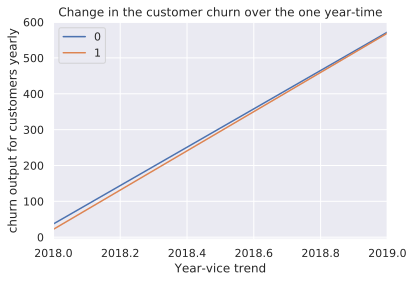

In [66]:
j.plot()
plt.xlabel('Year-vice trend')
plt.ylabel('churn output for customers yearly')
plt.title('Change in the customer churn over the one year-time')
plt.legend()
plt.show()

Very linear shape. I can't trust years. Reason is that there are only two values. So pattern of customers is not seen. Perhaps units are not defined very well. also there are only two and there is not nothing different happening between them. We need to choose another unit of analysis

In [0]:
# Let's try with months
data_month=df['End_sub'].dt.month.sort_values()

In [0]:
k=df.groupby(data_month)['Churn.Status'].value_counts()

In [69]:
k[:5]

End_sub  Churn.Status
1        0                55
         1                38
2        0                67
         1                63
3        0               109
Name: Churn.Status, dtype: int64

In [0]:
k=k.unstack('Churn.Status')

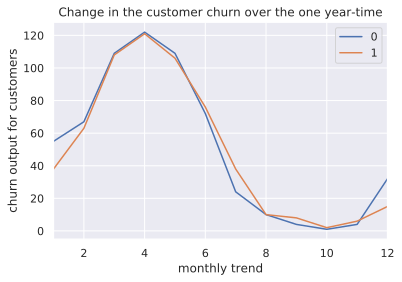

In [71]:
k.plot()
plt.xlabel('monthly trend')
plt.ylabel('churn output for customers')
plt.title('Change in the customer churn over the one year-time')
plt.legend()
plt.show()

Well. Something happened. In 4th month, we see a peak. And by end of 8th we saw a lowest point. It raised up , but not enough.

As far as churn vs loyal trend, we do not see much difference. These two classes are consistant and performs equally good or poor throughout 12 month period

In [0]:
# And then what about week

data_week=df['End_sub'].dt.week.sort_values()

In [73]:
data_week[:5]

497    1
258    1
370    1
90     1
33     1
Name: End_sub, dtype: int64

In [0]:
f=df.groupby(data_week)['Churn.Status'].value_counts()

In [75]:
f[:5]

End_sub  Churn.Status
1        0                9
         1                6
2        0               11
         1                6
3        1               10
Name: Churn.Status, dtype: int64

In [0]:
f=f.unstack('Churn.Status')

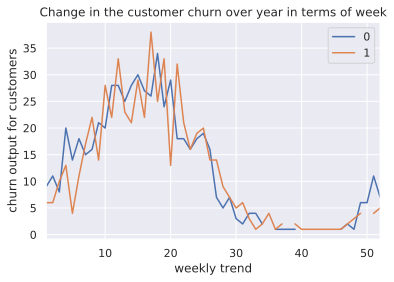

In [77]:
f.plot()
plt.xlabel('weekly trend')
plt.ylabel('churn output for customers')
plt.title('Change in the customer churn over year in terms of week')
plt.legend()
plt.show()

Both week and month plot went very high in middle i.e 16th week or 4th month. Then there is drop. It could be good if we have less churns. But, both values fall. I wonder why? I seems that curn and loyalty patterns are very similar. 

In [0]:
# We will make month value as standard for this dataset and also for our pilot one. As we do not have much in years
df['EndSubscription']=df['End_sub'].dt.month

In [0]:
df.drop(['End_sub'], axis=1, inplace=True)

In [80]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142,0.0,101.878898
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447,2.0,428.266455


### 3.3)- Back to data exploration

- describe 
- sort 
- Indexing and retrieving data
- Grouping 
- Summary table
- Correlation 


#### a)describe

In [81]:
df.describe()

,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Churn.Status,Customer.Age,Latitude,Longitude,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1196.000000,1200.000000,1200.000000
mean,1449.879167,47.963500,4701.768722,2028.306172,2673.462550,29.699167,2.175305e+06,201.230000,0.492500,50.263333,52.074026,5.237919,5.783333,11.969167,4.454167,1.919167,25.398840,1.997500,283.136650
std,1277.940982,43.534543,7179.935753,3057.212614,5186.763577,60.427490,6.940443e+06,300.211014,0.500152,20.474659,0.485962,0.764339,1.938949,2.055903,2.401952,2.379570,16.576489,1.368352,154.619332
min,-5.000000,-221.000000,29.460000,0.078409,23.813500,0.000000,1.016000e-01,1.000000,0.000000,1.000000,50.773218,3.487605,1.000000,5.000000,1.000000,1.000000,-25.053562,0.000000,-270.165814
25%,287.000000,9.392500,966.735000,330.172725,503.757469,3.000000,1.237192e+03,18.000000,0.000000,33.000000,51.813298,4.631314,4.000000,11.000000,3.000000,1.000000,14.421635,1.000000,177.920274
50%,1166.000000,38.730000,3530.894400,1333.372779,1553.224484,14.000000,1.321599e+05,77.500000,0.000000,49.000000,52.070498,5.121420,6.000000,12.000000,4.000000,1.000000,25.466279,2.000000,285.235647
75%,2245.750000,74.855000,5980.176000,2608.947728,3443.774867,31.000000,1.218452e+06,251.250000,1.000000,66.000000,52.367824,5.837226,7.000000,13.000000,6.000000,2.000000,36.632661,3.000000,395.239015
max,5451.000000,181.700000,146632.980000,41082.298830,127824.436900,874.000000,9.945640e+07,2596.000000,1.000000,100.000000,53.489374,6.977882,12.000000,18.000000,12.000000,49.000000,121.527382,8.000000,736.945877


We can find very quickly what are minimum values and what are maximum values. This gives us idea about peak and dip point irrespective of units. One thing is important to know if we look at at age max is 100. So mean is 60 and standard deviation is 20. It means this feature is very well spread accorss all age groups. Something very surprising. It seldom happens that a product is equally popular among all age groups. We ll come to this point later in detailed explaination

In [82]:
df.describe(include=['object', 'bool'])

,Customer.ID,Previous.provider,Customer.Municipality,Province
count,1200,1194,1200,1200
unique,1200,7,306,12
top,ADF1498,TELE2,Rotterdam,Zuid-Holland
freq,1,286,58,287


In [83]:
df['Churn.Status'].value_counts()

0    609
1    591
Name: Churn.Status, dtype: int64

**1 means the customer has churned, and 0 means no churn. There is not much difference so, we do not expect a biasness in class.609 users out of 1200 are loyal**

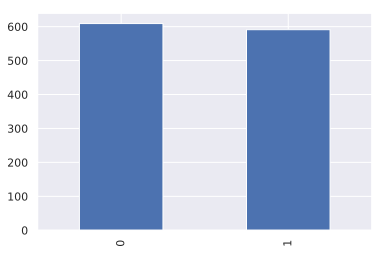

In [84]:
df['Churn.Status'].value_counts().plot(kind='bar')

In [85]:
df['Churn.Status'].value_counts(normalize=True)

0    0.5075
1    0.4925
Name: Churn.Status, dtype: float64

In [86]:
df['Churn.Status'].mean()

0.4925

**Horrible**

49.25% is actually really bad for a company; such a churn rate can make the company go bankrupt. Is there any problem with data or what? It can't be real for sure. I ll stop surprising and take it as an excercise now

### b)- Sorting

In [87]:
df.sort_values(by='Years.customer', ascending=False).head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
304,ADF1879,5451,181.70,1048.6200,686.902455,361.717545,29,7.215920e+01,23,Vodafone,0,40,Albrandswaard,51.858068,4.423187,Zuid-Holland,6,13,2,2,24.700151,0.0,433.177357
185,ADF1413,5374,179.13,6051.4800,4466.731665,1584.748335,0,5.256497e+05,682,Vodafone,0,28,Soest,52.176352,5.299197,Utrecht,8,13,12,3,15.190089,3.0,196.031014
221,ADF1368,5363,178.77,5536.3080,1875.355806,3660.952194,11,1.838702e+06,929,T-Mobile,0,35,Den Haag,52.070498,4.300700,Zuid-Holland,3,15,5,3,22.517582,4.0,553.337316
724,ADF1503,5349,178.30,7281.3024,2437.007145,4844.295255,9,1.512027e+05,379,KPN,0,21,Leidschendam-Voorburg,52.087731,4.399386,Zuid-Holland,5,14,3,1,5.109186,2.0,44.645899
378,ADF1324,5334,177.80,5252.4000,659.005735,4593.394265,0,5.263327e+04,1460,Telfort,0,22,Krimpenerwaard,51.982222,4.781667,Zuid-Holland,7,12,5,1,6.905020,2.0,-31.052222


In [88]:
df.sort_values(by=['Churn.Status', 'Years.customer'], ascending=[True, False]).head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
304,ADF1879,5451,181.70,1048.6200,686.902455,361.717545,29,7.215920e+01,23,Vodafone,0,40,Albrandswaard,51.858068,4.423187,Zuid-Holland,6,13,2,2,24.700151,0.0,433.177357
185,ADF1413,5374,179.13,6051.4800,4466.731665,1584.748335,0,5.256497e+05,682,Vodafone,0,28,Soest,52.176352,5.299197,Utrecht,8,13,12,3,15.190089,3.0,196.031014
221,ADF1368,5363,178.77,5536.3080,1875.355806,3660.952194,11,1.838702e+06,929,T-Mobile,0,35,Den Haag,52.070498,4.300700,Zuid-Holland,3,15,5,3,22.517582,4.0,553.337316
724,ADF1503,5349,178.30,7281.3024,2437.007145,4844.295255,9,1.512027e+05,379,KPN,0,21,Leidschendam-Voorburg,52.087731,4.399386,Zuid-Holland,5,14,3,1,5.109186,2.0,44.645899
378,ADF1324,5334,177.80,5252.4000,659.005735,4593.394265,0,5.263327e+04,1460,Telfort,0,22,Krimpenerwaard,51.982222,4.781667,Zuid-Holland,7,12,5,1,6.905020,2.0,-31.052222


### c)- Indexing and retrieving data

In [89]:
df['Churn.Status'].mean()

0.4925

We are more interested in knowing behavior of our loyal customers.So, let's focus there

In [90]:
#Boolean indexing
df[df['Churn.Status'] == 0].mean()

Years.customer                       1.606619e+03
Months.customer                      5.355392e+01
Minutes.in.2018                      5.016981e+03
Minutes.onnet                        2.449803e+03
Minutes.offnet                       2.567177e+03
Number.of.SMS                        2.460099e+01
KBs.used                             3.130041e+06
Total.Unique.Calls                   2.496141e+02
Churn.Status                         0.000000e+00
Customer.Age                         5.086535e+01
Latitude                             5.205266e+01
Longitude                            5.292958e+00
LoginsSite.Last.Month                5.446634e+00
LoginsSite.Last.6Months              1.200821e+01
EndSubscription                      4.438424e+00
Total.Call.centre.complaint.calls    2.091954e+00
MonthlySubscriptionPrice             3.096045e+01
PaidAfterPaymentDate                 1.486043e+00
PricePhone                           3.351222e+02
dtype: float64

**How much time (on average) do loyal users spend on the on-network calls?**

In [91]:
df[df['Churn.Status'] == 0]['Minutes.onnet'].mean()

2449.8033358673424

In [92]:
df[df['Churn.Status'] == 0]['Minutes.offnet'].mean()

2567.1771882681287

What is the maximum length of time do churned users spend on the on-network & off-net calls

In [93]:
df[df['Churn.Status'] == 0]['Minutes.onnet'].max()

41082.29883

In [94]:
df[df['Churn.Status'] == 0]['Minutes.offnet'].max()

40304.75321

There is difference in max and mean value. Could we have problem with some anomoly.We ll come to this later when we discuss outliers

### d)- Grouping

In [0]:
columns_to_show = ['Minutes.in.2018', 
                   'Minutes.onnet', 
                   'Minutes.offnet']

In [96]:
df.groupby(['Churn.Status'])[columns_to_show].describe(percentiles=[])

Minutes.in.2018               ... Minutes.offnet              
                       count         mean  ...            50%           max
Churn.Status                               ...                             
0                      609.0  5016.980524  ...    1817.530783   40304.75321
1                      591.0  4376.956561  ...     770.893964  127824.43690

[2 rows x 18 columns]

It is interesting to see how churn and not churn status remain very similar. Minutes onnet and offnet are summed upto minutesin2018. and there is no additional or any surprise comes out of them. Only thing that there is difference in mean and max values indicating a problem of datapoint spread and possiblity of outliers.

In [97]:
# Make a group analysis 
data_new = df[['Churn.Status', 'Minutes.in.2018', 'Minutes.onnet', 'Minutes.offnet', 'Customer.Age']]
data_corrs = data_new.corr()
data_corrs

,Churn.Status,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Customer.Age
Churn.Status,1.000000,-0.044584,-0.140012,0.020810,-0.029860
Minutes.in.2018,-0.044584,1.000000,0.774364,0.927850,-0.045579
Minutes.onnet,-0.140012,0.774364,1.000000,0.482512,-0.015731
Minutes.offnet,0.020810,0.927850,0.482512,1.000000,-0.053822
Customer.Age,-0.029860,-0.045579,-0.015731,-0.053822,1.000000


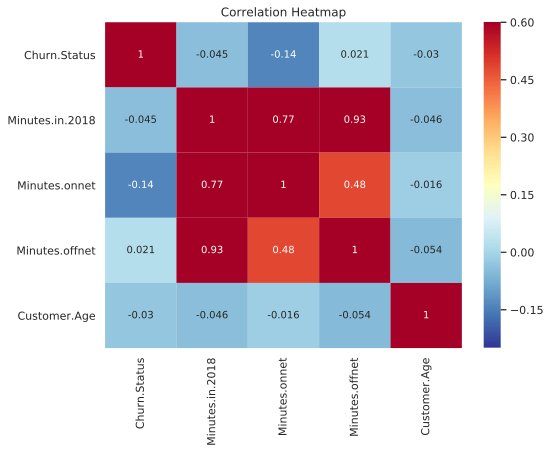

In [98]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Age is negatively related to them. Rest are +ve. It is interesting how minuteson net and offnet are so much related to each other and even of minutesin2018. It may cause colinearity problem as it looks like that these three features are explaining same effect. We ll apply later some stat to see if this is really true or not


**distribution of each of these features colored by the value of the churn status**

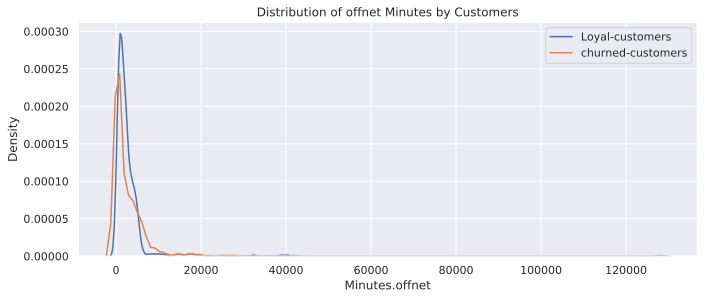

In [99]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['Minutes.offnet']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot when customer remained loyal
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 0, source], label = 'Loyal-customers')
    # plot when customers left 
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 1, source], label = 'churned-customers')
    
    # Label the plots
    plt.title('Distribution of offnet Minutes by Customers')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

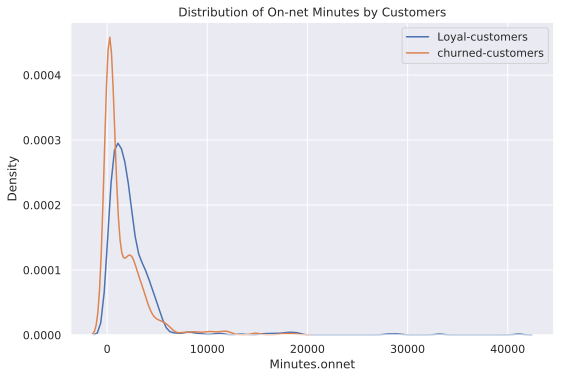

In [100]:
plt.figure(figsize = (8, 10))

# iterate through the sources
for i, source in enumerate(['Minutes.onnet']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot when customer remained loyal
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 0, source], label = 'Loyal-customers')
    # plot when customers left 
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 1, source], label = 'churned-customers')
    
    # Label the plots
    plt.title('Distribution of On-net Minutes by Customers')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2)

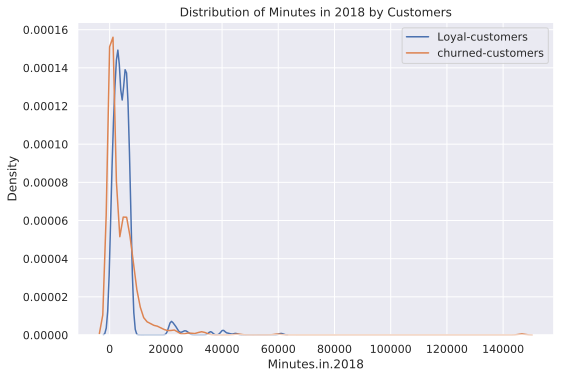

In [101]:
plt.figure(figsize = (8, 10))

# iterate through the sources
for i, source in enumerate(['Minutes.in.2018']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot when customer remained loyal
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 0, source], label = 'Loyal-customers')
    # plot when customers left 
    sns.kdeplot(data_new.loc[data_new['Churn.Status'] == 1, source], label = 'churned-customers')
    
    # Label the plots
    plt.title('Distribution of Minutes in 2018 by Customers')
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2)

In [102]:
# Same effect could be seen for PaidAfterPaymentDate,MonthlySubscriptionPrice,PricePhone and their effect on customer churn
 
data_new2 = df[['Churn.Status', 'MonthlySubscriptionPrice', 'PaidAfterPaymentDate', 'PricePhone', 'Customer.Age']]
data_corrs2 = data_new2.corr()
data_corrs2

,Churn.Status,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone,Customer.Age
Churn.Status,1.000000,-0.339604,0.379584,-0.341440,-0.029860
MonthlySubscriptionPrice,-0.339604,1.000000,-0.139595,0.124429,0.038607
PaidAfterPaymentDate,0.379584,-0.139595,1.000000,-0.129260,-0.029001
PricePhone,-0.341440,0.124429,-0.129260,1.000000,0.056383
Customer.Age,-0.029860,0.038607,-0.029001,0.056383,1.000000


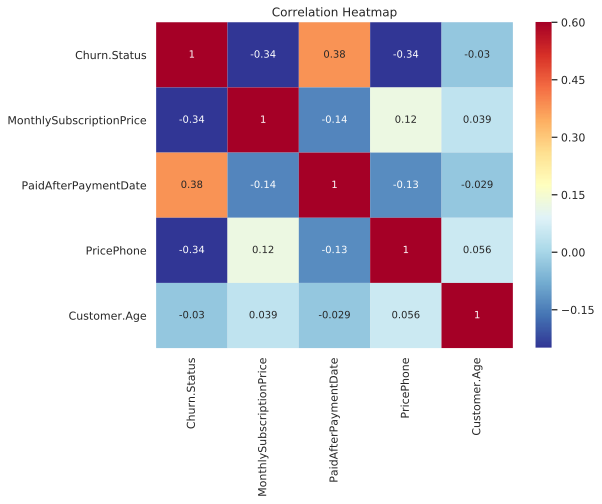

In [103]:
plt.figure(figsize = (8, 6))

sns.heatmap(data_corrs2, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Now this is interesting. All variables seem in relation to each other somewhat. But, they never shows too high values.

Customer age is 0.056 times close to phone price. It makes sense in genral. Younger customers may be price sensitive

**What about customer age. How does it go with churning pattern?**

In [104]:
df.groupby(['Customer.Age'])['Churn.Status'].size()

Customer.Age
1       1
2       2
18     23
19     20
20     15
21     21
22     21
23     15
24     27
25     19
26     16
27     17
28     18
29     24
30     14
31     14
32     16
33     23
34     17
35     24
36     29
37      9
38     17
39     14
40     19
41     12
42     26
43     17
44     21
45     18
       ..
71     14
72     16
73     14
74     11
75     10
76     11
77     11
78     12
79     15
80      8
81      3
82      8
83      6
84     13
85      9
86      6
87      4
88      8
89      3
90      3
91      8
92      2
93      5
94      5
95      4
96      3
97      2
98      4
99      2
100     1
Name: Churn.Status, Length: 85, dtype: int64

In [0]:
# Age information into a separate dataframe
age_data = df[['Churn.Status', 'Customer.Age']]

In [106]:
# Bin the age data
age_data['age_bin'] = pd.cut(age_data['Customer.Age'], bins = np.linspace(20, 100, num = 11))
age_data.head(10)

,Churn.Status,Customer.Age,age_bin
0,0,44,"(36.0, 44.0]"
1,0,31,"(28.0, 36.0]"
2,0,35,"(28.0, 36.0]"
3,1,54,"(52.0, 60.0]"
4,0,53,"(52.0, 60.0]"
5,0,79,"(76.0, 84.0]"
6,0,33,"(28.0, 36.0]"
7,1,76,"(68.0, 76.0]"
8,0,77,"(76.0, 84.0]"
9,0,34,"(28.0, 36.0]"


In [107]:
age_groups = age_data.groupby('age_bin').mean()
age_groups

,Churn.Status,Customer.Age
age_bin,,
"(20.0, 28.0]",0.525974,24.350649
"(28.0, 36.0]",0.490683,32.813665
"(36.0, 44.0]",0.503704,40.918519
"(44.0, 52.0]",0.496552,48.365517
"(52.0, 60.0]",0.557047,56.114094
"(60.0, 68.0]",0.479452,64.417808
"(68.0, 76.0]",0.451923,72.259615
"(76.0, 84.0]",0.500000,80.223684
"(84.0, 92.0]",0.395349,87.953488


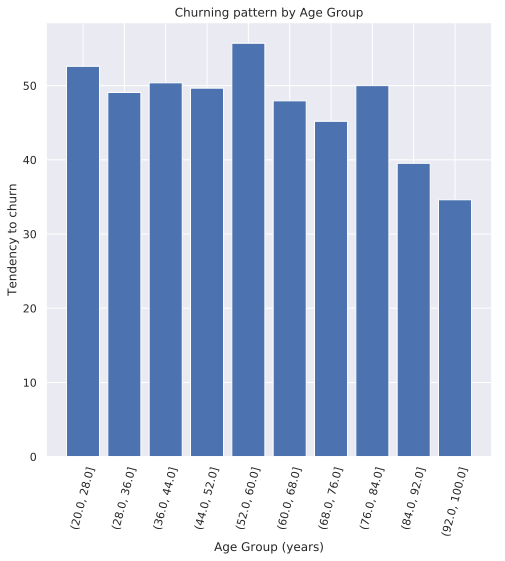

In [108]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * (age_groups['Churn.Status']))

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Tendency to churn')
plt.title('Churning pattern by Age Group');

**Again, I am surprised why customers wit age 1 & 2 are listed there. Then There are some customers with age plus 90. Actually out of this small sample, there is rather large number of customer > 80.**

Not that am against senior citizens. Just wondering how come

### Checking muncipality categories

As they 357 so, we cannot check all. We will see most important.

In [0]:
df=df.rename(index=str, columns={"Customer.Municipality": "municipality"})

In [110]:
# use count vector for names of municipalities

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df['municipality'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [111]:
len(cvec.get_feature_names())

357

In [0]:
zero_doc_matrix = cvec.transform(df[df['Churn.Status'] == 0].municipality)
one_doc_matrix = cvec.transform(df[df['Churn.Status'] == 1].municipality)

In [0]:
import numpy as np
zero_tf = np.sum(zero_doc_matrix,axis=0)
one_tf = np.sum(one_doc_matrix,axis=0)

In [0]:
neg = np.squeeze(np.asarray(zero_tf))
pos = np.squeeze(np.asarray(one_tf))

In [0]:
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names())

In [116]:
term_freq_df.head()

,aalburg,aalten,aan,achtkarspelen,alblasserdam,albrandswaard,alkmaar,almelo,almere,alphen,ambacht,amersfoort,amstel,amstelveen,amsterdam,anthonis,apeldoorn,arnhem,assen,baarn,bakel,barendrecht,barneveld,beek,beemster,beesel,beijerland,berg,bergen,berkelland,bernheze,best,betuwe,beuningen,beverwijk,bilt,binnenmaas,bladel,blaricum,bloemendaal,...,waalwijk,waddinxveen,wageningen,wassenaar,waterland,weert,weesp,werkendam,westerveld,westland,weststellingwerf,westvoorne,wierden,wijchen,wijdemeren,winsum,winterswijk,wittem,woensdrecht,woerden,wolden,wormerland,woudenberg,woudrichem,zaanstad,zand,zederik,zeewolde,zeist,zevenaar,zoetermeer,zoeterwoude,zoom,zuidhorn,zuidplas,zundert,zutphen,zwartewaterland,zwijndrecht,zwolle
0,0,1,10,1,0,1,6,7,13,5,1,11,0,4,18,1,6,8,4,1,1,0,2,0,1,0,1,2,2,3,1,1,1,1,2,4,0,1,0,2,...,0,1,2,2,2,3,0,2,0,4,2,1,0,0,1,0,1,1,1,2,1,1,0,0,4,1,1,1,3,3,3,1,1,1,2,3,4,2,2,9
1,1,1,10,0,1,2,4,3,10,4,1,4,1,2,39,0,6,3,1,2,0,2,0,1,1,2,0,1,2,2,0,3,1,0,1,3,1,0,2,0,...,1,2,0,1,1,0,2,0,1,6,0,0,1,2,0,1,1,0,2,1,0,1,1,1,1,1,0,1,3,3,3,0,2,1,2,2,1,1,3,4


In [117]:
term_freq_df=term_freq_df.transpose()
term_freq_df.head()

,0,1
aalburg,0,1
aalten,1,1
aan,10,10
achtkarspelen,1,0
alblasserdam,0,1


In [118]:
term_freq_df.columns = ['loyal', 'churn']
term_freq_df['total'] = term_freq_df['loyal'] + term_freq_df['churn']
term_freq_df.head()

,loyal,churn,total
aalburg,0,1,1
aalten,1,1,2
aan,10,10,20
achtkarspelen,1,0,1
alblasserdam,0,1,1


In [119]:
term_freq_df.sort_values(by='total', ascending=False).head()

,loyal,churn,total
den,25,34,59
rotterdam,20,38,58
amsterdam,18,39,57
haag,17,24,41
almere,13,10,23


In [0]:
term_freq_df.to_pickle('term_freq_mat.pkl')

In [0]:
term_freq_df.to_csv('term_freq_mat.csv')

Text(0.5, 1.0, 'Top 50 municipalities for loyal customers')

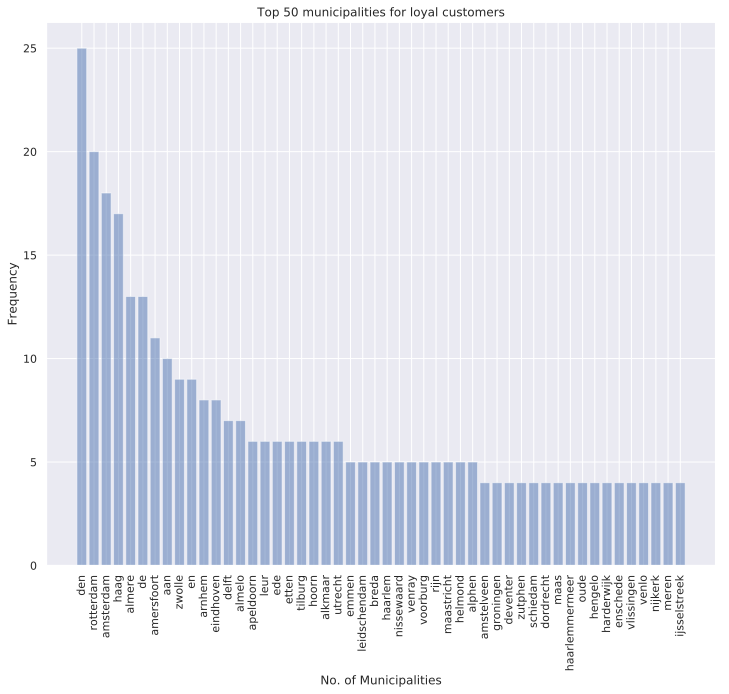

In [122]:
y_one = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_one, term_freq_df.sort_values(by='loyal', ascending=False)['loyal'][:50], align='center', alpha=0.5)
plt.xticks(y_one, term_freq_df.sort_values(by='loyal', ascending=False)['loyal'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('No. of Municipalities')
plt.title('Top 50 municipalities for loyal customers')

This is interesting/. It is not a prediction. But, we can see a trend that those in South of Holland are more loyal than others.

Text(0.5, 1.0, 'Top 50 municipalities for churn customers')

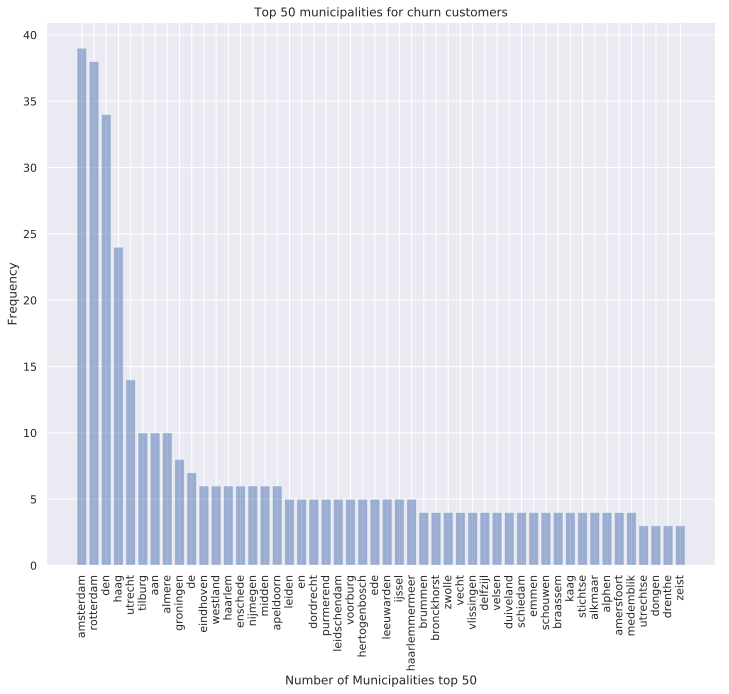

In [123]:
y_one = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_one, term_freq_df.sort_values(by='churn', ascending=False)['churn'][:50], align='center', alpha=0.5)
plt.xticks(y_one, term_freq_df.sort_values(by='churn', ascending=False)['churn'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Number of Municipalities top 50')
plt.title('Top 50 municipalities for churn customers')

And Alas we are back to point zero. The customer trend for churn is highest in south area as was loyalty pattern. From such inference, we would not get any useful information. Classes are balances. Hence, there is no point of checking our patterns for churn vs loyalty

**we plot, loyal frequency on X-axis, and churn frequency on Y-axis**

Text(0.5, 1.0, 'Loyalty Frequency vs Churn Frequency')

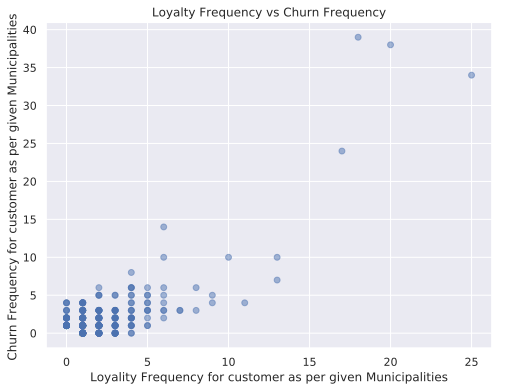

In [124]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="loyal", y="churn",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Churn Frequency for customer as per given Municipalities ')
plt.xlabel('Loyality Frequency for customer as per given Municipalities')
plt.title('Loyalty Frequency vs Churn Frequency')

Most of the words are below 10 on both X-axis and Y-axis, and we cannot see a meaningful relation between loyal and churn frequency.<br>

In order to come up with a meaningful metric which can characterise important tokens in each class, I borrowed a metric presented by Jason Kessler in PyData 2017 Seattle. In the talk, he presented a Python library called Scattertext. Even though I did not make use of the library, the metrics used in the Scattertext as a way of visualising text data are very useful in filtering meaningful tokens from the frequency data.
Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class. In the below code I named it as 'churn_rate',


**loyalty_rate=(loyalt frequency/loyalt frequency+churn frequency)**

In [0]:
term_freq_df['loyalty_rate'] = term_freq_df['loyal'] * 1./term_freq_df['total']
term_freq_df['churn_rate'] = term_freq_df['churn'] * 1./term_freq_df['total']

In [126]:
term_freq_df.head()

,loyal,churn,total,loyalty_rate,churn_rate
aalburg,0,1,1,0.0,1.0
aalten,1,1,2,0.5,0.5
aan,10,10,20,0.5,0.5
achtkarspelen,1,0,1,1.0,0.0
alblasserdam,0,1,1,0.0,1.0


**Further data analysis can be made on these two matrices for prediction of churn_rate or loyalty rate. Let's see if my suggestion might make things better !!!**

### e)- Summary tables

Suppose we want to see how the observations in our dataset are distributed in the context of two variables - Churn and province. To do so, we can build a contingency table using the crosstab method

In [127]:
pd.crosstab(df['Churn.Status'], df['Province'],margins=True)

Province,Drenthe,Flevoland,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland,All
Churn.Status,,,,,,,,,,,,,
0,19,20,19,86,9,47,89,83,46,43,16,132,609
1,16,19,16,63,18,25,80,104,29,46,20,155,591
All,35,39,35,149,27,72,169,187,75,89,36,287,1200


In [128]:
pd.crosstab(df['Churn.Status'], df['Total.Call.centre.complaint.calls'],margins=True)

Total.Call.centre.complaint.calls,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,21,49,All
Churn.Status,,,,,,,,,,,,,,,,,,,,
0,335,144,49,30,14,13,7,3,2,1,5,2,2,1,0,1,0,0,0,609
1,431,89,30,14,6,6,2,2,1,3,1,1,1,0,1,0,1,1,1,591
All,766,233,79,44,20,19,9,5,3,4,6,3,3,1,1,1,1,1,1,1200


Surprising. As our loyal customers seem to complain as lot

In [129]:
pd.crosstab(df['Churn.Status'], df['Previous.provider'], margins=True)

Previous.provider,0,Ben,KPN,T-Mobile,TELE2,Telfort,Vodafone,All
Churn.Status,,,,,,,,
0,23,91,142,82,117,70,80,605
1,11,80,132,50,169,49,98,589
All,34,171,274,132,286,119,178,1194


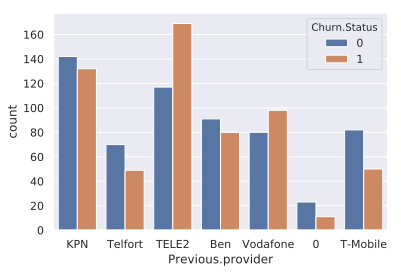

In [130]:
sns.countplot(x='Previous.provider', hue='Churn.Status', data=df);

### f)- Correlation

In [0]:
corr = df[df.columns].corr()

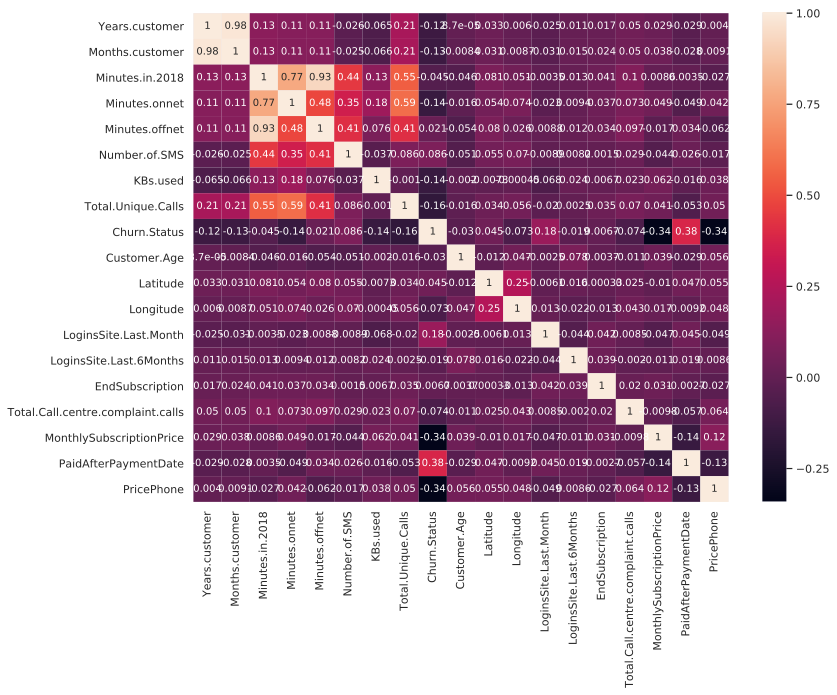

In [132]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot = True)

We can find that some features are too related to each other.. It is bit too early to jump to any conclusion but, there might be a problem that these feature would produce multi-coliearity issue i.e two variables capture same effect and hence model could not predict results strongly.

# 4- Preprocessing Data

- Missing value check
- Duplicate values
- Outlier detection
- Encoding of categorical variables
- Separate feature as of labels aka TARGET and analysis features
- Transformation 
- Dimensionality Reduction

In [133]:
na_sum = list(df.isnull().sum())
print(len(na_sum))

23


In [134]:
na_col = list(df.isnull().sum().index)
print(len(na_col))

23


General role is that if a feature has more than 30%  of values are null, just drop the whole column.

### 4.1)- Checking missing values in columns and rows

In [135]:
drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 2523:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  0  Columns


In [0]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [137]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  2


,No. of mising Value,%age of missing Value
Previous.provider,6,0.5
MonthlySubscriptionPrice,4,0.3


In [0]:
# imput null with mean values
df = df.fillna(df.mean())

In [139]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  1


,No. of mising Value,%age of missing Value
Previous.provider,6,0.5


**We will deal with "Previous.provider" feature very soon in encoding section**

### 4.2)- Duplicate values

Above all , customers are the most critical variable to check

In [0]:
cust=df['Customer.ID']

In [141]:
#patent.appln_abstr.duplicated()
cust.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1170    False
1171    False
1172    False
1173    False
1174    False
1175    False
1176    False
1177    False
1178    False
1179    False
1180    False
1181    False
1182    False
1183    False
1184    False
1185    False
1186    False
1187    False
1188    False
1189    False
1190    False
1191    False
1192    False
1193    False
1194    False
1195    False
1196    False
1197    False
1198    False
1199    False
Name: Customer.ID, Length: 1200, dtype: bool

In [142]:
cust.duplicated().sum()

0

Again we are lucky to have no duplicate value issue

In [0]:
# For saving our cleaned data
#df_clean=df

In [144]:
df.shape

(1200, 23)

In [0]:
import pickle
df.to_pickle('file_clean.pkl')
df.to_csv('file_clean.csv')

### 4.3)-Outlier Detection 

**Tukey IQR**<br>
Identifies extreme values in data
Outliers are defined as:<br>
Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)<br>
Standard deviation from the mean is another common method to detect extreme values
But it can be problematic:<br>
- Assumes normality
- Sensitive to very extreme values


In [0]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [147]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142,0.0,101.878898
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447,2.0,428.266455


In [0]:
df_outlier=df['Years.customer']

In [149]:
tukey_indices, tukey_values = find_outliers_tukey(df_outlier)
print(np.sort(tukey_values))

[5334 5349 5363 5374 5451]


In [150]:
df['Years.customer'].mean()

1449.8791666666666

In [151]:
tukey_indices, tukey_values = find_outliers_tukey(df['Minutes.in.2018'])
print(np.sort(tukey_values))


[ 13724.52    13995.78    14134.62    14508.72    14930.628   15001.5984
  15149.544   15407.7     16341.24    16570.8     16998.72    17046.96
  17392.944   17641.08    18744.4296  18784.188   19020.84    20038.272
  20675.7     21379.74    21504.9     21647.052   21649.32    21666.96
  21953.64    22088.64    22144.98    22480.908   22669.8     22754.1
  22881.06    23085.      23328.9912  23450.76    23467.8     23986.308
  24012.4248  25479.36    26687.16    26903.34    27853.98    28041.372
  28319.28    31326.9     32561.34    32967.792   34000.9248  35876.472
  35958.      40130.88    40193.8056  40615.3344  42377.244   44799.2208
  45580.272   59815.26    60992.652  146632.98  ]


In [152]:
df['Minutes.in.2018'].mean()

4701.768722099999

In [153]:
tukey_indices, tukey_values = find_outliers_tukey(df['LoginsSite.Last.Month'])
print(np.sort(tukey_values))

[12 12 12]


In [154]:
df['LoginsSite.Last.Month'].mean()

5.783333333333333

In [155]:
tukey_indices, tukey_values = find_outliers_tukey(df['MonthlySubscriptionPrice'])
print(np.sort(tukey_values))

[-25.05356207 -24.66877605 -23.93419953 -23.76066018 -23.01305238
 -22.28120264 -21.46178148  71.76800539  75.69802807  77.70014476
  93.0981858  121.52738159]


**We need to solve this problem through scaling**

### 4.4)- Encoding categorical features

In [156]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142,0.0,101.878898
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447,2.0,428.266455


In [157]:
df.shape

(1200, 23)

This shape is gonna increase here 

In [158]:
pd.get_dummies(df['Province']).iloc[:,1:].head()

,Flevoland,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [0]:
province_dummy=pd.get_dummies(df['Province'],prefix='Province').iloc[:,1:]

In [0]:
df=pd.concat([df,province_dummy],axis=1)

In [161]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone,Province_Flevoland,Province_Friesland,Province_Gelderland,Province_Groningen,Province_Limburg,Province_Noord-Brabant,Province_Noord-Holland,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid-Holland
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142,0.0,101.878898,0,0,0,0,0,0,0,0,1,0,0
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447,2.0,428.266455,0,0,0,0,0,0,0,0,0,0,0


In [162]:
df.shape

(1200, 34)

In [163]:
df.Province[:5]

0          Utrecht
1          Drenthe
2    Noord-Brabant
3    Noord-Holland
4    Noord-Brabant
Name: Province, dtype: object

Need to drop existing one as it has been encoded.

In [0]:
df.drop(['Province'], axis=1, inplace=True)

In [165]:
df.shape

(1200, 33)

**let's move to Customer.Municipality**

In [166]:
len(df['municipality'].value_counts())

306

**It is a big number. We cannot ignore though. It is much more focussed and can be a valuable feature for our analysis**

In [167]:
pd.get_dummies(df['municipality']).iloc[:,1:].head()

,Aalburg,Aalten,Achtkarspelen,Alblasserdam,Albrandswaard,Alkmaar,Almelo,Almere,Alphen aan den Rijn,Alphen-Chaam,Amersfoort,Amstelveen,Amsterdam,Apeldoorn,Arnhem,Assen,Baarn,Barendrecht,Barneveld,Beek,Beemster,Beesel,Berg en Dal,Bergen,Bergen op Zoom,Berkelland,Bernheze,Best,Beuningen,Beverwijk,Binnenmaas,Bladel,Blaricum,Bloemendaal,Bodegraven-Reeuwijk,Boekel,Borger-Odoorn,Borsele,Boxmeer,Boxtel,...,Vlissingen,Voorschoten,Vught,Waalre,Waalwijk,Waddinxveen,Wageningen,Wassenaar,Waterland,Weert,Weesp,Werkendam,Westerveld,Westland,Weststellingwerf,Westvoorne,Wierden,Wijchen,Wijdemeren,Winsum,Winterswijk,Woensdrecht,Woerden,Wormerland,Woudenberg,Woudrichem,Zaanstad,Zederik,Zeewolde,Zeist,Zevenaar,Zoetermeer,Zoeterwoude,Zuidhorn,Zuidplas,Zundert,Zutphen,Zwartewaterland,Zwijndrecht,Zwolle
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
municipality_dummy=pd.get_dummies(df['municipality'],prefix='municipality').iloc[:,1:]

In [0]:
df=pd.concat([df, municipality_dummy],axis=1)

In [170]:
df.shape

(1200, 338)

In [171]:
len(df['municipality'].value_counts())

306

In [0]:
df.drop(['municipality'], axis=1, inplace=True)

In [173]:
df.shape

(1200, 337)

**Finally, we have Previous.provider**

In [174]:
len(df['Previous.provider'].value_counts())

7

In [0]:
provider_dummy=pd.get_dummies(df['Previous.provider'],prefix='Previous.provider').iloc[:,1:]

In [0]:
df=pd.concat([df,provider_dummy],axis=1)

In [177]:
df.shape

(1200, 343)

In [0]:
df.drop(['Previous.provider'], axis=1, inplace=True)

In [179]:
df.shape

(1200, 342)

### 4.5)- Round2: Missing values removal

If we remember, we also have to fillin values for this features. So, let's fill value "most frequent". <br>

We can also drop customer_ID values.These values are not much of interest for our model.

In [0]:
df.drop(['Customer.ID'], axis=1, inplace=True)

In [181]:
df.shape

(1200, 341)

In [182]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
        verbose=0)

In [183]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  0


,No. of mising Value,%age of missing Value


### 4.6)- Separate features

In [0]:
# For future use
df_tunning=df.copy()

In [185]:
df_tunning.shape

(1200, 341)

In [186]:
df_tunning['Churn.Status'][:5]

0    0
1    0
2    0
3    1
4    0
Name: Churn.Status, dtype: int64

In [0]:
import pickle
df_tunning.to_pickle('file_model_tune.pkl')
df_tunning.to_csv('file_model_tune.csv')

In [0]:
df_labels=df['Churn.Status']

In [189]:
df_labels[:5]

0    0
1    0
2    0
3    1
4    0
Name: Churn.Status, dtype: int64

In [0]:
df_model = df.drop(['Churn.Status'], axis=1)

### 4.7)Transformation

Normalize data. It will take care of our outlier problem.

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_model) # Since we have separated our label i.e churn feature.So, all other values are in X

In [192]:
X.shape

(1200, 340)

### 4.8)-Dimension Reduction

PCA methods being used <br>
Find out what is fairly good value for n_components according to the Explained Variance Ratio <br>
Reduce dimensions by the n_components <br>

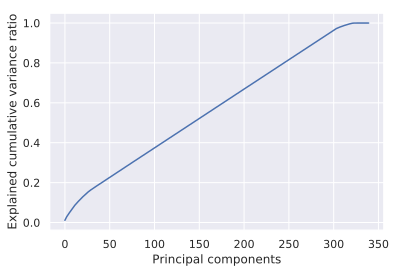

In [193]:
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,340), pca_full.explained_variance_ratio_.cumsum())
plt.ylabel('Explained cumulative variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

In [194]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 300)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')

[[ 6.11027942e-01  2.40476349e-01 -4.21067402e-02 ... -7.95055765e-14
  -8.95452221e-14 -1.11279627e-13]
 [ 1.12537445e+00 -1.73917509e+00 -2.21049113e-01 ... -8.10975667e-13
  -4.06176556e-12  2.23935948e-12]
 [ 7.18470250e-02  1.36948413e+00  1.53627530e+00 ... -1.03131808e-13
   5.63302270e-14 -1.90170876e-13]
 ...
 [-5.02448473e-01  1.91021072e+00 -1.37537505e+00 ... -2.98051978e-14
  -2.03592139e-14  2.49713640e-14]
 [-1.57717539e+00  1.53696363e+00 -1.34363061e+00 ... -1.62317623e-14
  -3.26889658e-15  3.22672030e-14]
 [ 1.11980428e+00 -1.65188282e+00 -2.72275709e-02 ... -4.64955072e+00
  -4.57695329e+00  2.07251382e+00]]



In [195]:
print(pca.explained_variance_ratio_)

[0.01124215 0.00923817 0.00835421 0.00695272 0.00673929 0.00644317
 0.00632986 0.00625408 0.00623485 0.00615195 0.00609792 0.00606911
 0.00520151 0.00511273 0.00485447 0.00479742 0.00473607 0.00469102
 0.00455539 0.00452542 0.00441768 0.00421033 0.00414237 0.00412912
 0.00407948 0.0040224  0.00392107 0.00356903 0.0033751  0.00324102
 0.00314423 0.00306118 0.00303635 0.00301758 0.00298715 0.0029808
 0.00297787 0.00297692 0.00297135 0.00296968 0.00296891 0.00296838
 0.00296742 0.00296714 0.00296609 0.00296555 0.00296504 0.00296485
 0.00296451 0.00296337 0.00296299 0.00296212 0.00296202 0.00296128
 0.00296084 0.00296035 0.00296012 0.00296005 0.00295929 0.00295912
 0.00295906 0.00295877 0.00295865 0.00295789 0.00295775 0.0029575
 0.00295717 0.00295666 0.002956   0.00295572 0.00295559 0.00295547
 0.00295534 0.00295532 0.0029551  0.00295485 0.00295468 0.00295464
 0.00295442 0.00295424 0.00295403 0.00295396 0.00295345 0.00295344
 0.00295343 0.00295337 0.00295334 0.00295321 0.00295312 0.002953

In [196]:
sum(pca.explained_variance_ratio_)

0.960544967790518

This shows that our 300 dimensions cover enough of features' effect as we need. There is no rule of how much lower one should go. It is better to get as much of feature effect as we could

In [197]:
x_pca.shape

(1200, 300)

# 5)- Model Training

### 5.1)-Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, df_labels, test_size=0.1660, random_state=0)

In [199]:
print(X_train.shape)
print(X_test.shape)

(1000, 300)
(200, 300)


In [200]:
print(y_train.shape)
print(y_test.shape)

(1000,)
(200,)


In [201]:
X_train

array([[ 6.66236956e-01, -1.07948937e-01, -1.79978451e+00, ...,
         3.30346422e-14,  2.26944084e-15,  5.32341686e-14],
       [-1.31267099e+00,  4.75307752e-01,  1.96901061e+00, ...,
         5.11901689e-14,  1.23466599e-13, -5.41321758e-14],
       [ 1.68111614e+00,  3.12510689e+00, -1.02967683e+00, ...,
         1.03458322e-12,  8.11978880e-13, -2.86227590e-13],
       ...,
       [ 2.61632862e-01, -1.70079328e+00,  1.06938846e+00, ...,
        -4.12857880e-14, -2.56251433e-13, -2.08814859e-15],
       [ 8.95738213e-01,  1.48478386e+00,  1.47478864e+00, ...,
         3.06273817e-12,  3.31000953e-12,  2.58080512e-12],
       [ 7.59126541e-01,  4.22942549e-01,  1.06936197e-01, ...,
        -5.05351872e-12,  4.97986746e-13,  6.37981903e-12]])

### 5.2)- Model Building

In [0]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [203]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.6889999999999998
NB 0.5210000000000001
KNN 0.57
DT 0.612
RF 0.607
SVM 0.643


In [204]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "recall")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.6771412404488373
NB 0.6793494296170562
KNN 0.6630986996287394
DT 0.5802611693172766
RF 0.5402418339411883
SVM 0.6164053043943809


[Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

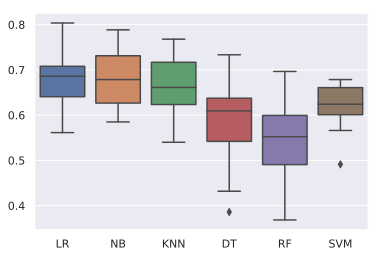

In [205]:
ax = sns.boxplot(data=results)
figsize=(16, 7)
ax.set_xticklabels(names)

This is only for trained model. We still need to confirm from our predictions if these trained models are any good

# 6)- Prediction 

In [0]:
# Logistic Classifeir
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
predictions_LR = logreg.predict(X_test)

In [207]:
predictions_LR[:5]

array([1, 1, 1, 1, 0])

In [208]:
print(accuracy_score(y_test,predictions_LR))

0.625


In [209]:
print(recall_score(y_test,predictions_LR))

0.6593406593406593


In [0]:
# Naive BAyes
nb = GaussianNB()
nb.fit(X_train,y_train)
predictions_nb = nb.predict(X_test)

In [211]:
print(predictions_nb[:5])

[1 1 1 1 0]


In [212]:
predictions_nb.shape

(200,)

In [213]:
print(accuracy_score(y_test,predictions_nb))

0.505


In [214]:
print(recall_score(y_test,predictions_nb))

0.8021978021978022


In [0]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# For minkowski, we need to pick parameter. 1 was for manhaten distance and p=2 for Euclidean distance.
knn.fit(X_train,y_train)
predictions_knn = knn.predict(X_test)

In [216]:
print(predictions_knn[:5])

[1 1 0 1 1]


In [217]:
print(accuracy_score(y_test,predictions_knn))

0.53


In [218]:
print(recall_score(y_test,predictions_knn))

0.5934065934065934


In [219]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
pred_dt[:5]

array([0, 1, 1, 0, 0])

In [220]:
recall_score(y_test,pred_dt)

0.6373626373626373

In [0]:
dt_score=recall_score(y_test,pred_dt)

So, Naive Bayes predicts the best results of recall.It may be the best option for accuracy though.

### 6.1)- confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. <br>
Key matrix elements are:<br>
- true positives (TP): These are cases in which we predicted yes (customers churned), and actually they do have churned i.e left.
- true negatives (TN): We predicted loyal customers,actually they were.
- false positives (FP): We predicted churned customers, but actually they were loyal ones. (Also known as a "Type I error.")
- false negatives (FN): We predicted non-churned customers, but they actually have left i.e churned. (Also known as a "Type II error.")

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [223]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_nb)
cm

array([[28, 81],
       [18, 73]])

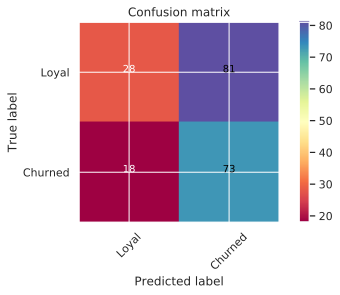

In [224]:
# False=0; True=1 ====> Loyal=0, Churned=1
plot_confusion_matrix(cm, classes=['Loyal', 'Churned'])

We ll come to explain confusion matrix soon

In [225]:
# For Naive Bayes
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.61      0.26      0.36       109
           1       0.47      0.80      0.60        91

    accuracy                           0.51       200
   macro avg       0.54      0.53      0.48       200
weighted avg       0.55      0.51      0.47       200



We can that recall is a bad idea because we get very good prediction of class 1 .But class 0 is poor. And we in excercise are told that we need to take care of prediction about our loyal customers than churned ones. Our company wants to keep its friends closer. So, naive bayes seems good choice . It actually was not. In overall sense, its accuarcy was poor too.

So, we go back to our baseline model ie logistic regression

In [226]:
# For Logistic Model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.68      0.60      0.63       109
           1       0.58      0.66      0.62        91

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.63      0.62      0.63       200



Definitly better option than Naive bayes. We do not get great accuracy or recall. But, it is more consistent with both classes. So, our predictions will not be biased.

In [227]:
cm = confusion_matrix(y_test, predictions_LR)
cm

array([[65, 44],
       [31, 60]])

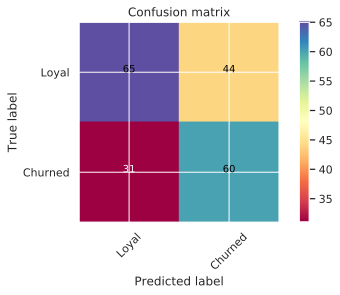

In [228]:
plot_confusion_matrix(cm, classes=['Loyal', 'Churned'])

We have 65 values where our model predicted loyal customers and they turned out to be staying customers .So good job! <br>
We have 31 values where our model predicted non-leaving customers and they were actually churned ones. That's really uncool.<br>
We have 44 values where our model predicted churned customers. Actually those poor guys were loyal customers. Sorry ! <br>
We have 60 values where we predicted leaving customers and they actually were leaving. <br>
**Note**<br>

We can imagine that our model does not look very accurate. Still we only made 60 right predictions regarding churned customers successfully.Also, we have made 65 right predictions about loyals ones.<br>
We left out 44 churned ones. In real world if data was huge, that won't not really bad. But, we have a smaller dataset. 44 means 22% false positives.That's where accuracy matrics fails. <br>
One issue with recall is that our model got very ideal situation where class of churned and loyal customer is almost same.Hence, we got pretty much same number i.e 60 for True positive and 65 True negatives.If classes were imbalanced then sensivity would be better idea.In our case, accuracy better idea.<br>
If we tend to focus(as mentioned in excercise) more on our loyal customers than our churned ones then we need to check True positive and False negative results seriously.<br>
Note that we are falsely predicting 31 loyal customers i.e 15.5% . An alarming %age even though our data is small yet we cannot be that wrong on our focussed segment <br>
Those who are actually loyal to us is our concern and our prediction should get better results there.<br>

### 6.2)- predict_proba


In [229]:
logreg.predict_proba(X_test)[0:10, :]

array([[0.00702769, 0.99297231],
       [0.05677301, 0.94322699],
       [0.17139181, 0.82860819],
       [0.25806063, 0.74193937],
       [0.85927449, 0.14072551],
       [0.0297898 , 0.9702102 ],
       [0.77252735, 0.22747265],
       [0.99299809, 0.00700191],
       [0.06353945, 0.93646055],
       [0.7019255 , 0.2980745 ]])

Left column shows for class 0(loyal) and right for class 1(churned)

In [230]:
# Logistic probability prediction for only class 0 i.e Loyal customer as per excercise requirement
pred_prob_cl0 = logreg.predict_proba(X_test)[:, 0]
print(pred_prob_cl0[:5])

[0.00702769 0.05677301 0.17139181 0.25806063 0.85927449]


In [231]:
pred_prob_cl1 = logreg.predict_proba(X_test)[:, 1]
print(pred_prob_cl0[:5])

[0.00702769 0.05677301 0.17139181 0.25806063 0.85927449]


Text(0, 0.5, 'Frequency')

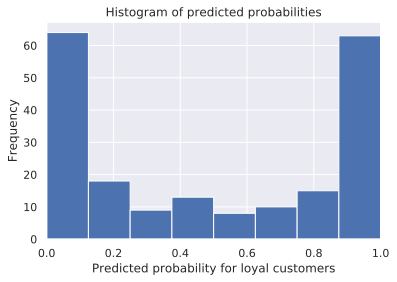

In [232]:
# histogram of predicted probabilities
plt.hist(pred_prob_cl0, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for loyal customers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

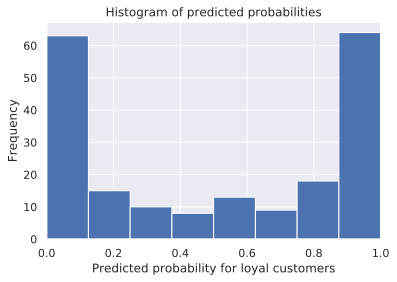

In [233]:
# histogram of predicted probabilities for churned customers
plt.hist(pred_prob_cl1, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for loyal customers')
plt.ylabel('Frequency')

### 6.3)- ROC curve

In [0]:
from sklearn.metrics import roc_curve
roc_score=roc_curve(y_test, pred_prob_cl1)


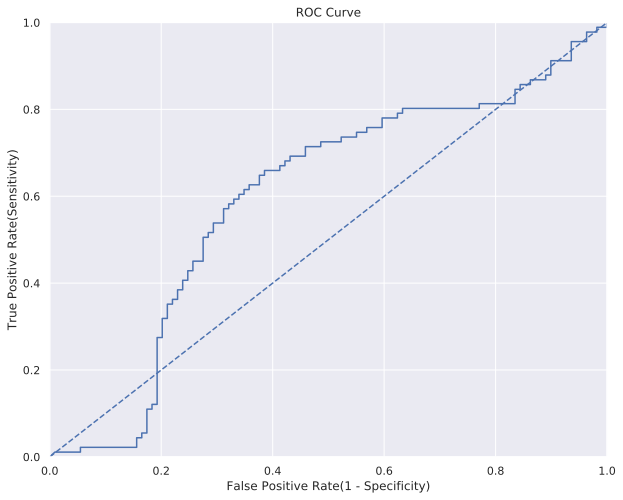

In [235]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, pred_prob_cl1)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

This plot shows that we do not get perfect values. It is stair like graph. We would like to have curved one. Additionally, there are some values that are below our linear line. Our optimal point is 0.4 precision and 0.68(or so) sensitivity. So, this model is not bad. Please take a look at classification report and its value for logistic model.

### 6.4)- AUC


In [236]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5945659844742414

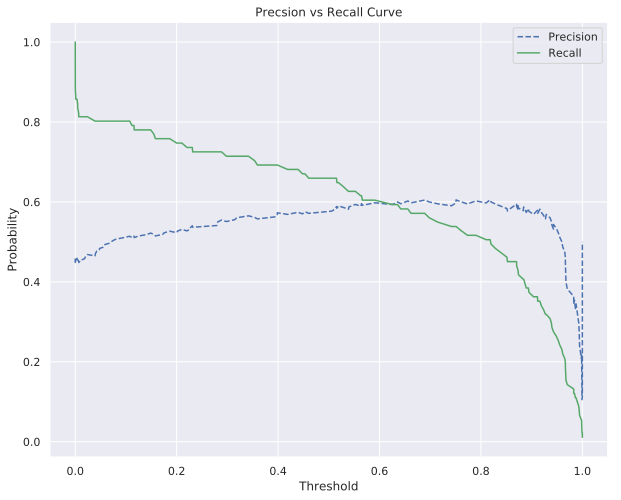

In [237]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl1)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

Ideally, we get threshold point at 0.5 where both sensitivity and precision cross each other. In our case, it is 0.6 slightly higher than what we should have. It slightly gives a hint that our model has few values that are making it tough to provide good and precise prediction. We ll try to work on these features through a techniques in machine learning called "Feature Engineering. Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work"

# 7)-Features' Engineering

Like End Game-Avengers, we need to go back in right time slots of our working notebook and fix some things.

In [0]:
# Applying base-line model with statistics concepts
df = pd.read_pickle('file_clean.pkl')

In [239]:
df.shape

(1200, 23)

**We will drop few variables. Customer ID because they are no good for our analysis. municipality becuase they have close relation with province categories. We will prove logic of our assumption later as well.**

In [0]:
df.drop(['Customer.ID'], axis=1, inplace=True)

In [0]:
df.drop(['municipality'], axis=1, inplace=True)

In [242]:
df.shape

(1200, 21)

In [0]:
province_dummy=pd.get_dummies(df['Province'],prefix='Province').iloc[:,1:]

In [0]:
df=pd.concat([df,province_dummy],axis=1)

In [0]:
df.drop(['Province'], axis=1, inplace=True)

In [0]:
provider_dummy=pd.get_dummies(df['Previous.provider'],prefix='Previous.provider').iloc[:,1:]

In [0]:
df=pd.concat([df,provider_dummy],axis=1)

In [0]:
df.drop(['Previous.provider'], axis=1, inplace=True)

In [249]:
df.shape

(1200, 36)

In [250]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(df)
summary_missing(df)

No. of fields:  1200
No. of missing fields:  0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,No. of mising Value,%age of missing Value


In [0]:
df_labels=df['Churn.Status']

In [0]:
df_model = df.drop(['Churn.Status'], axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_model)

In [254]:
X.shape

(1200, 35)

In [255]:
type(X)

numpy.ndarray

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df_labels, test_size=0.1660, random_state=0)

In [0]:
import statsmodels.api as sm

In [258]:
logit= sm.Logit(y_train,sm.add_constant(X_train)).fit()

         Current function value: 0.433305
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [259]:
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.375     
Dependent Variable:  Churn.Status      AIC:               938.6103  
Date:                2019-06-20 08:51  BIC:               1115.2895 
No. Observations:    1000              Log-Likelihood:    -433.31   
Df Model:            35                LL-Null:           -693.15   
Df Residuals:        964               LLR p-value:       1.2316e-87
Converged:           0.0000            Scale:             1.0000    
No. Iterations:      35.0000                                        
--------------------------------------------------------------------
       Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
--------------------------------------------------------------------
const -0.0071       0.3100 -0.0230 0.9817       -0.6146       0.6004
x1     2.9081      34.6531  0.0839 0.9331      -65.0107      70.8269
x2    -3.2881      35.4149 -0.0928 0.9260      -72.7001      66.1239
x3     0.1721 4290753.1618  0.0000 1.0000 -8409721.4914 8409721.8357
x4    -0.5025 1827000.2882 -0.0000 1.0000 -3580855.2672 3580854.2621
x5     0.4258 3099626.9305  0.0000 1.0000 -6075156.7235 6075157.5751
x6     0.2686       0.1267  2.1197 0.0340        0.0202       0.5169
x7    -0.5704       0.1594 -3.5774 0.0003       -0.8829      -0.2579
x8    -0.5457       0.1355 -4.0274 0.0001       -0.8113      -0.2801
x9     0.0280       0.0854  0.3277 0.7432       -0.1393       0.1953
x10    0.0875       0.2890  0.3028 0.7621       -0.4788       0.6538
x11    0.1154       0.2577  0.4476 0.6544       -0.3898       0.6205
x12    0.4030       0.0890  4.5263 0.0000        0.2285       0.5776
x13   -0.0637       0.0857 -0.7429 0.4576       -0.2318       0.1044
x14   -0.0475       0.0789 -0.6020 0.5472       -0.2021       0.1071
x15   -0.0556       0.0810 -0.6870 0.4921       -0.2143       0.1031
x16   -0.8331       0.0999 -8.3421 0.0000       -1.0289      -0.6374
x17    1.0193       0.1059  9.6275 0.0000        0.8118       1.2268
x18   -0.8053       0.0952 -8.4560 0.0000       -0.9919      -0.6186
x19   -0.0458       0.1538 -0.2975 0.7661       -0.3471       0.2556
x20    0.0025       0.1305  0.0195 0.9844       -0.2532       0.2583
x21   -0.2661       0.2668 -0.9971 0.3187       -0.7890       0.2569
x22   -0.0261       0.1322 -0.1972 0.8436       -0.2852       0.2331
x23   -0.1161       0.2972 -0.3907 0.6960       -0.6986       0.4664
x24   -0.0318       0.3810 -0.0834 0.9336       -0.7784       0.7149
x25    0.1267       0.3153  0.4018 0.6878       -0.4913       0.7447
x26   -0.2556       0.1718 -1.4875 0.1369       -0.5923       0.0812
x27    0.1269       0.2405  0.5274 0.5979       -0.3446       0.5983
x28    0.0566       0.2516  0.2248 0.8221       -0.4366       0.5498
x29    0.1124       0.4615  0.2437 0.8075       -0.7921       1.0170
x30    0.1622       0.1866  0.8689 0.3849       -0.2036       0.5279
x31    0.3697       0.2192  1.6864 0.0917       -0.0600       0.7993
x32    0.1004       0.1735  0.5789 0.5626       -0.2396       0.4404
x33    0.4936       0.2234  2.2092 0.0272        0.0557       0.9315
x34    0.2454       0.1689  1.4528 0.1463       -0.0857       0.5765
x35    0.3238       0.1915  1.6906 0.0909       -0.0516       0.6992
====================================================================

"""

In [260]:
df_model.columns

Index(['Years.customer', 'Months.customer', 'Minutes.in.2018', 'Minutes.onnet',
       'Minutes.offnet', 'Number.of.SMS', 'KBs.used', 'Total.Unique.Calls',
       'Customer.Age', 'Latitude', 'Longitude', 'LoginsSite.Last.Month',
       'LoginsSite.Last.6Months', 'EndSubscription',
       'Total.Call.centre.complaint.calls', 'MonthlySubscriptionPrice',
       'PaidAfterPaymentDate', 'PricePhone', 'Province_Flevoland',
       'Province_Friesland', 'Province_Gelderland', 'Province_Groningen',
       'Province_Limburg', 'Province_Noord-Brabant', 'Province_Noord-Holland',
       'Province_Overijssel', 'Province_Utrecht', 'Province_Zeeland',
       'Province_Zuid-Holland', 'Previous.provider_Ben',
       'Previous.provider_KPN', 'Previous.provider_T-Mobile',
       'Previous.provider_TELE2', 'Previous.provider_Telfort',
       'Previous.provider_Vodafone'],
      dtype='object')

### Note

- X6,7,8,12,16,31,33 are significant variables. 

- They are 'Number.of.SMS', 'KBs.used','Total.Unique.Calls','LoginsSite.Last.Month', 'MonthlySubscriptionPrice',PaidAfterPaymentDate', 'PricePhone', ''Previous.provider_KPN,Previous.provider_TELE2,Previous.provider_Vodafone.

### VIF -Variance Inflation Factor

impact of collinearity among the variables in a regression model. The Variance Inflation Factor (VIF) is 1/Tolerance, it is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that **exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern**

In [0]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train, i) for i in range(X.shape[1])]

In [0]:
vif["features"] = df_model.columns

In [263]:
vif

,VIF Factor,features
0,22.754582,Years.customer
1,22.715536,Months.customer
2,inf,Minutes.in.2018
3,inf,Minutes.onnet
4,inf,Minutes.offnet
5,1.480005,Number.of.SMS
6,1.132736,KBs.used
7,1.890282,Total.Unique.Calls
8,1.046374,Customer.Age
9,10.911609,Latitude


**Features that are in danger VIF value are years.customers, month.customer,Latitude, longitutde(8.60 pretty high too) , Province_Zuid-Holland,Province_Noord-Holland,Province_Noord-Brabant,Province_Limburg,Province_Gelderland.**

We will drop some features. As either they are giving us information that we already know.**This is not random choice. We know from co-relation heatmap, from our logistic analysis what are most important features, also we have calculated p-values, checked t-test, and finally we have taken care of multi-colinearity where our dependent features are depending on each other and presenting a duplicate effect of their prediction. Hence, we ll drop those ** <br>

i)- drop Minutes.onnet and Minutes.offnet. They are adding up in Minutes.in.2018 and hence are not doing much favor to our analysis. Also co-relation heatmap showed that they are telling same story.<br>
ii)- We will keep Months.customer. As years.customers is giving same information about time passed since the subscriber started using the services. They both reflect time and one can compliment other.<br>
iii)-customer.ID will not do anything in analysis as it is ID . Let's drop that too.<br>
iv)-Customer.Municipality and Province are also giving same information about location. Only one needed.Additionally, we have seen that their p-values are lower than threshold point of 0.05 and hence, they show no signficance. We have taken province as it shows less categories and hence, may provide us useful analysis.<br>
v)- Longitude and Latitude are all about location. We can get that information from Province or Customer.Municipality.Also, they show VIF values greater than 10 so , they are multi-colieanr. Let's drop them both.<br>
vi)-LoginsSite.Last.Month and LoginsSite.Last.6Months are also same i.e co-related to each other. So, we will keep one out of them.<br>

In [0]:
df_feat = df.drop(['Years.customer','Minutes.onnet','Minutes.offnet','Latitude','Longitude','LoginsSite.Last.6Months'], axis=1)

In [265]:
df_feat.shape

(1200, 30)

In [266]:
df_feat.head(2)

,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Total.Unique.Calls,Churn.Status,Customer.Age,LoginsSite.Last.Month,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,PaidAfterPaymentDate,PricePhone,Province_Flevoland,Province_Friesland,Province_Gelderland,Province_Groningen,Province_Limburg,Province_Noord-Brabant,Province_Noord-Holland,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid-Holland,Previous.provider_Ben,Previous.provider_KPN,Previous.provider_T-Mobile,Previous.provider_TELE2,Previous.provider_Telfort,Previous.provider_Vodafone
0,126.83,4091.616,81,3624.3750,117,0,44,6,5,2,45.640142,0.0,101.878898,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,96.83,3179.280,101,551842.8331,106,0,31,8,4,2,21.871447,2.0,428.266455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df_feat.to_pickle('file_feature.pkl')

In [0]:
df_feat.to_csv('file_feature.csv', index=False)

### 7.1)-Quick check to missing values

In [269]:
#calling already made function
summary_missing(df_feat)

No. of fields:  1200
No. of missing fields:  0


,No. of mising Value,%age of missing Value


In [0]:
# For future use
df_tunning=df_feat.copy()

In [271]:
df_tunning.shape

(1200, 30)

In [0]:
df_tunning.to_pickle('file_model_tune_feature.pkl')

In [0]:
y=df_feat['Churn.Status']

In [0]:
df_model = df_feat.drop(['Churn.Status'], axis=1)

### 7.4)-Normalization

In [0]:
X = StandardScaler().fit_transform(df_model)

In [276]:
X[:2]

array([[ 1.81233973e+00, -8.50156788e-02,  8.49319108e-01,
        -3.13032680e-01, -2.80686297e-01, -3.06034140e-01,
         1.11790997e-01,  2.27340467e-01,  3.39838921e-02,
         1.22363692e+00, -1.46039374e+00, -1.17277265e+00,
        -1.83280472e-01, -1.73328931e-01, -3.76523230e-01,
        -1.51716521e-01, -2.52645576e-01, -4.04868529e-01,
        -4.29651251e-01, -2.58198890e-01,  3.53314960e+00,
        -1.75863115e-01, -5.60667729e-01, -4.07652742e-01,
         1.83835852e+00, -3.51561525e-01, -5.59383844e-01,
        -3.31787969e-01, -4.17334755e-01],
       [ 1.12294446e+00, -2.12136089e-01,  1.18043229e+00,
        -2.34010779e-01, -3.17342468e-01, -9.41230066e-01,
         1.14370789e+00, -1.89161152e-01,  3.39838921e-02,
        -2.13239650e-01,  1.82777690e-03,  9.39017851e-01,
        -1.83280472e-01, -1.73328931e-01, -3.76523230e-01,
        -1.51716521e-01, -2.52645576e-01, -4.04868529e-01,
        -4.29651251e-01, -2.58198890e-01, -2.83033586e-01,
        -1.75

In [277]:
X.shape

(1200, 29)

### 7.5)-Train-test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1660, random_state=0)

In [279]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 29)
(200, 29)
(1000,)
(200,)


# 8)- Back to Modeling

Fingers crossed !!!

In [0]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [281]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.777
NB 0.6849999999999999
KNN 0.669
DT 0.8089999999999999
RF 0.8329999999999999
SVM 0.762


In [282]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "recall")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.7740263504563406
NB 0.7236833892412343
KNN 0.7097250458082136
DT 0.8134957433055744
RF 0.7983665058873599
SVM 0.7577437508701164


### 8.1-Logistic Classification

In [283]:
# Logistic Classifeir
lg = LogisticRegression(C=1e5)
lg.fit(X_train, y_train)
predictions_lg = lg.predict(X_test)
predictions_lg[:5]

array([1, 1, 1, 1, 0])

In [284]:
print(accuracy_score(y_test, predictions_lg))

0.74


In [285]:
print(recall_score(y_test, predictions_lg))

0.7912087912087912


In [0]:
lg_score=recall_score(y_test, predictions_lg)

In [287]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_lg))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       109
           1       0.69      0.79      0.73        91

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



Logistic classification is our go to model. Let's explore it a little after feature modification and see how it has effected it

**GridSearchCV using Logistic Model**

In [288]:
def get_bootstrap_samples(df_feat, n_samples):
    """Generate samples using bootstrapping."""
    indices = np.random.randint(0, len(df_feat), (n_samples, len(df_feat)))
    samples = df_feat[indices]
    return samples

def stat_intervals(stat, alpha):
    """Make an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# Save the complaint tend of those who churned
churn = df[df['Churn.Status'] == 1]['Total.Call.centre.complaint.calls'].values

# Set the random seed for reproducibility 
np.random.seed(0)

# Generate bootstrap samples and calculate the mean for each sample
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn, 1000)]

# Print the interval estimate for the sample means
print("Mean interval", stat_intervals(churn_mean_scores, 0.1))

Mean interval [1.5785956  1.94086294]


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

we will create a LogisticRegression model and use class_weight='balanced' as we do not have much difference in our churn variable

In [0]:
lr = LogisticRegression(random_state=5, class_weight='balanced')

Let's try to find the best regularization coefficient, which is the coefficient C for logistic regression. Then, we will have an optimal model that is not overfit and is a good predictor of the target variable.

In [0]:
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In order to find the optimal value of C, let's apply stratified 5-fold validation and look at the "Recall" score against different values of the parameter C. Use the StratifiedKFold function for this:

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

One of the important metrics of model quality is the Recall. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.It varies from 0 to 1.The best value is 1 and the worst value is 0.

In [293]:
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, scoring='recall', cv=skf)
grid_search = grid_search.fit(X, y)
grid_search.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Another important metrics of model quality is the Area Under the Curve (AUC). ROC AUC varies from 0 to 1. The closer ROC AUC to 1, the better the quality of the classification model.<br>
We ll come back to this in model Tunning section

In [294]:
grid_search2 = GridSearchCV(lr, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search2 = grid_search.fit(X, y)
grid_search2.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

model is stable if the standard deviation on validation is less than 0.5 threshold value

In [295]:
grid_search2.cv_results_['std_test_score'][1]

0.03330860846625888

In [296]:
grid_search.best_score_

0.7783957057399231

In [0]:
log_score=grid_search.best_score_

Not a great improvement by implementing thsi GridSearchCV. But we get confirmation that we are heading in right direction. And after applying two models and feature extraction, we can see that our recall score has improved uptill 70%. We will not stop here. 

**Feature importance**

What is the most important feature for the best logistic regression model?<br>
Feature importance is defined by the absolute value of its corresponding coefficient. First we need to normalize all the feature values so that it will be correct to compare them. 

In [0]:
df_fi = pd.read_pickle('file_model_tune_feature.pkl')

In [0]:
independent_columns_names=df_fi.copy()

In [300]:
independent_columns_names.shape

(1200, 30)

In [0]:
y=df_fi["Churn.Status"]

In [0]:
independent_columns_names.drop(['Churn.Status'], axis=1, inplace=True)

In [303]:
independent_columns_names.shape

(1200, 29)

In [0]:
X=df_fi.copy()

In [305]:
X.shape

(1200, 30)

In [0]:
X.drop(['Churn.Status'], axis=1, inplace=True)

In [307]:
X.shape

(1200, 29)

In [308]:
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=0.001, random_state=5, class_weight='balanced')
scal = StandardScaler()
lr.fit(scal.fit_transform(X), y)

pd.DataFrame({'feat': independent_columns_names,
              'coef': lr.coef_.flatten().tolist()}).sort_values(by='coef', ascending=False)

,feat,coef
10,"(P, a, i, d, A, f, t, e, r, P, a, y, m, e, n, ...",0.163243
6,"(L, o, g, i, n, s, S, i, t, e, ., L, a, s, t, ...",0.075616
26,"(P, r, e, v, i, o, u, s, ., p, r, o, v, i, d, ...",0.044647
2,"(N, u, m, b, e, r, ., o, f, ., S, M, S)",0.039262
18,"(P, r, o, v, i, n, c, e, _, N, o, o, r, d, -, ...",0.025655
15,"(P, r, o, v, i, n, c, e, _, G, r, o, n, i, n, ...",0.022433
28,"(P, r, e, v, i, o, u, s, ., p, r, o, v, i, d, ...",0.020120
22,"(P, r, o, v, i, n, c, e, _, Z, u, i, d, -, H, ...",0.018827
21,"(P, r, o, v, i, n, c, e, _, Z, e, e, l, a, n, d)",0.008339
20,"(P, r, o, v, i, n, c, e, _, U, t, r, e, c, h, t)",0.008110


This shows some of the most important and least important features. A table worth looking for management and data science team.

In [309]:
#how much "Number.of.SMS" variable affects the prediction using the softmax function.
print((np.exp(lr.coef_[0]) / np.sum(np.exp(lr.coef_[0])))[5])

0.034365896979871725


### 8.2)-Random Forest

In [310]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
pred_rf[:5]

array([1, 1, 0, 0, 0])

In [311]:
print(accuracy_score(y_test, pred_rf))

0.825


In [312]:
print(recall_score(y_test, pred_rf))

0.8021978021978022


In [0]:
rf0_score=recall_score(y_test, pred_rf)

**Using GridCV **

In [314]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='recall', cv=skf, verbose=True)
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   32.0s finished


In [315]:
# Recall
print(rf_grid_search.best_score_)

0.858


In [0]:
rf_score=rf_grid_search.best_score_

In [317]:
rf_score

0.858

In [318]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='accuracy', cv=skf, verbose=True)
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   32.4s finished


In [319]:
# Accuracy-score
print(rf_grid_search.best_score_)

0.862


### 8.3)-support-vector Model

In [320]:
# SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
pred_svc[:5]

array([1, 1, 1, 1, 0])

In [321]:
print(accuracy_score(y_test, pred_svc))

0.75


In [322]:
print(recall_score(y_test, pred_svc))

0.7912087912087912


In [0]:
svc_score=recall_score(y_test, pred_svc)

### 8.4)-Naive Bayes

In [324]:
# Naive BAyes
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
pred_nb[:5]

array([1, 1, 0, 1, 1])

In [325]:
print(accuracy_score(y_test, pred_nb))

0.64


In [326]:
print(recall_score(y_test, pred_nb))

0.7142857142857143


In [0]:
nb_score=recall_score(y_test, pred_nb)

### 8.5)-KNN

In [328]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# For minkowski, we need to pick parameter. 1 was for manhaten distance and p=2 for Euclidean distance.
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
pred_knn[:5]

array([1, 1, 1, 1, 0])

In [329]:
print(accuracy_score(y_test, pred_knn))

0.625


In [330]:
print(recall_score(y_test, pred_knn))

0.6923076923076923


In [0]:
knn_score=recall_score(y_test, pred_knn)

### 8.6)- Neural Network
Steps to follow<br>

1-Build the Neural Network <br>
2 -Set the hyperparameters, train the NN and evaluate<br>
3- Adapt SGD method to improve the accuracy & Recall score<br>

**a)-Build the Neural Network**

In [0]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # TODO: Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # TODO: Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        # TODO: Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

**Train the model**

In [333]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

print(metrics.accuracy_score(y_test,y_pred[0]))

print(metrics.recall_score(y_test,y_pred[0]))

0.75
0.7912087912087912


In [0]:
NN_score=metrics.recall_score(y_test,y_pred[0])

In [335]:
NN_score

0.7912087912087912

**c)-SGD**

Stochastic gradient descent

In [0]:

#N_i = X_train.shape[1]
#network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

#random_row_idx = np.zeros(32)
#for e in range(epochs):
#    random_row_idx = np.random.choice(X_train.shape[0],size=32)
#    X_batch = X_train[random_row_idx,:]
#    y_batch = y_train[random_row_idx]
#    network.train(X_batch, y_batch)


In [0]:
#y_pred = network.run(X_test)
#y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

#print(metrics.accuracy_score(y_test,y_pred[0]))
#print(metrics.recall_score(y_test,y_pred[0]))

I commented gradient descent . I only apply feed forward neural network. I will use back propagation using tensorflow library next.

https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7

### 8.7)-Neural Network using Tensorflow

Back Propagation:Backpropagation algorithms are a family of methods used to efficiently train artificial neural networks following a gradient descent approach that exploits the chain rule


In [337]:
import tensorflow as tf
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions_tf = list(classifier.predict(X_test, as_iterable=True))
tf_score = metrics.recall_score(y_test, predictions_tf)
tf_acc = metrics.accuracy_score(y_test, predictions_tf)

W0620 08:56:08.482423 139671656273792 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0620 08:56:08.483962 139671656273792 deprecation.py:323] From <ipython-input-337-268d8154354f>:3: infer_real_valued_columns_from_input (from tensorflow.contrib.learn.python.learn.estimators.estimator) is deprecated and will be removed in a future version.
Instructions for updating:
Please specify feature columns explicitly.
W0620 08:56:08.486249 139671656273792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py:143: setup_train_data_feeder (from tensorflow.contrib.learn.python.learn.learn_io.data_

In [338]:
print('TF Recall Score: ', tf_score)
print('TF Accuracy Score: ', tf_acc)

TF Recall Score:  0.7802197802197802
TF Accuracy Score:  0.745


### 8.8)- Dense Neural Network



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [340]:
X_train.shape[1]

29

In [341]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

W0620 08:56:42.411968 139671656273792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 08:56:42.415959 139671656273792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 08:56:42.418649 139671656273792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 08:56:42.465950 139671656273792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0620 08:56:42.474346 

In [342]:
 #compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

W0620 08:56:44.509508 139671656273792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 08:56:44.539007 139671656273792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.



In [343]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [344]:
# call the function to fit to the data (training the network)
history=model.fit(X_train, y_train, epochs = 500, batch_size=20, validation_data=(X_test, y_test))

Train on 1000 samples, validate on 200 samples
Epoch 1/500
1000/1000 [==============================] - 1s 653us/step - loss: 0.6999 - acc: 0.5450 - val_loss: 0.7153 - val_acc: 0.5250
Epoch 2/500
1000/1000 [==============================] - 0s 266us/step - loss: 0.6838 - acc: 0.5950 - val_loss: 0.6873 - val_acc: 0.5550
Epoch 3/500
1000/1000 [==============================] - 0s 296us/step - loss: 0.6485 - acc: 0.6250 - val_loss: 0.6648 - val_acc: 0.5850
Epoch 4/500
1000/1000 [==============================] - 0s 277us/step - loss: 0.6292 - acc: 0.6620 - val_loss: 0.6418 - val_acc: 0.6150
Epoch 5/500
1000/1000 [==============================] - 0s 298us/step - loss: 0.6068 - acc: 0.6890 - val_loss: 0.6136 - val_acc: 0.6750
Epoch 6/500
1000/1000 [==============================] - 0s 269us/step - loss: 0.5828 - acc: 0.6980 - val_loss: 0.5899 - val_acc: 0.7100
Epoch 7/500
1000/1000 [==============================] - 0s 274us/step - loss: 0.5517 - acc: 0.7330 - val_loss: 0.5703 - val_acc: 0

**In last few epochs , we can that training accuracy is 99%. But validation accuracy is 69 or 70 % at best. Perfect example of overfitting where our model is trained so well but, its validation is not good enough.**

In [0]:
y_pred_keras = model.predict(X_test)

In [346]:
y_pred_keras[:5]

array([[1.0000000e+00],
       [7.7188015e-06],
       [2.9802322e-08],
       [1.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [0]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)

In [348]:
print(recall_score(y_test, yhat_class_keras))
print(accuracy_score(y_test, yhat_class_keras))

0.7252747252747253
0.695


In [0]:
keras_score = recall_score(y_test, yhat_class_keras)
keras_acc = accuracy_score(y_test, yhat_class_keras)

In [350]:
keras_score

0.7252747252747253

In [351]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, yhat_class_keras))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71       109
           1       0.65      0.73      0.68        91

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.70       200



In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

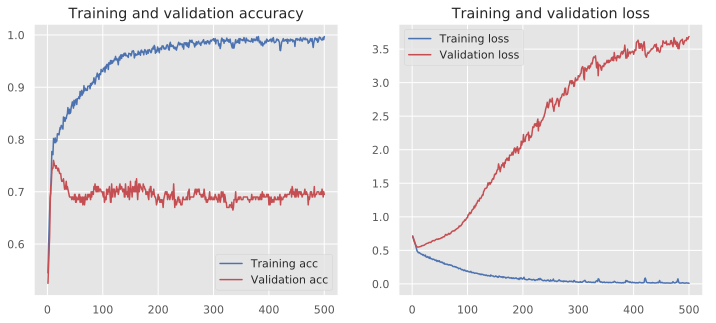

In [353]:
plot_history(history)

# Who's Winner?

In [354]:
models = pd.DataFrame({
    'Model': ['Simple Logistic Model', 'Decison Tree', 'Support Vector Machine', 'Random Forest','Naive-Bayes','K-Nearest Neighbor','Dense Neural Net',
              'Simple Neural Network', 'Backpropagation NN',],
    'Recall-Score': [log_score, dt_score, svc_score, rf_score,nb_score,knn_score, keras_score,
                     NN_score, tf_score]})
models.sort_values(by='Recall-Score', ascending=False)

,Model,Recall-Score
3,Random Forest,0.858000
2,Support Vector Machine,0.791209
7,Simple Neural Network,0.791209
8,Backpropagation NN,0.780220
0,Simple Logistic Model,0.778396
6,Dense Neural Net,0.725275
4,Naive-Bayes,0.714286
5,K-Nearest Neighbor,0.692308
1,Decison Tree,0.637363


We know Random forest did provide best value for recall. It also did very well for accuracy part i.e 86% . It is highest of all.

Logistic Regression 74%,SVC gave 75%, Naive bayes 64%, KNN 62%, Feed forward neural net 75%, Back propagation neural net 74.5% , Dense neural net 69%

In short Random Forest is best and most optimized model out of all.

# 9)- Checking our best model for evaluation 

In [0]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')

In [0]:
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

In [357]:
%%time
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='recall', cv=skf, verbose=True)
rf_grid_search = rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   33.3s finished


CPU times: user 1.15 s, sys: 123 ms, total: 1.27 s
Wall time: 33.6 s


In [358]:
# Recall
print(rf_grid_search.best_score_)

0.858


In [359]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

### 9.1)- Best-Features

In [360]:
pd.DataFrame({'feat': independent_columns_names,
              'coef': rf_grid_search.best_estimator_.feature_importances_}).sort_values(by='coef', ascending=False)

,feat,coef
1,"(M, i, n, u, t, e, s, ., i, n, ., 2, 0, 1, 8)",0.249702
9,"(M, o, n, t, h, l, y, S, u, b, s, c, r, i, p, ...",0.141519
10,"(P, a, i, d, A, f, t, e, r, P, a, y, m, e, n, ...",0.124300
2,"(N, u, m, b, e, r, ., o, f, ., S, M, S)",0.095206
11,"(P, r, i, c, e, P, h, o, n, e)",0.092648
3,"(K, B, s, ., u, s, e, d)",0.068200
4,"(T, o, t, a, l, ., U, n, i, q, u, e, ., C, a, ...",0.065391
0,"(M, o, n, t, h, s, ., c, u, s, t, o, m, e, r)",0.039991
6,"(L, o, g, i, n, s, S, i, t, e, ., L, a, s, t, ...",0.031057
5,"(C, u, s, t, o, m, e, r, ., A, g, e)",0.026019


We could better model recall and accuracy if we get rid of unimportant features. But, we will settle for this outcome for now. Sometimes too much work can ruin the fun

### 9.3)- predict_proba

In [361]:
rf_grid_search.predict_proba(X_test)[0:10, :]

array([[0.48497775, 0.51502225],
       [0.56129844, 0.43870156],
       [0.54990492, 0.45009508],
       [0.74017591, 0.25982409],
       [0.47514835, 0.52485165],
       [0.16555967, 0.83444033],
       [0.74758655, 0.25241345],
       [0.91894588, 0.08105412],
       [0.18334369, 0.81665631],
       [0.54712232, 0.45287768]])

In [362]:
pred_prob_zero = rf_grid_search.predict_proba(X_test)[:, 0]
print(pred_prob_zero[:5])

[0.48497775 0.56129844 0.54990492 0.74017591 0.47514835]


Text(0, 0.5, 'Frequency')

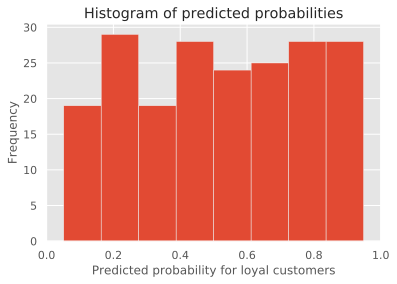

In [363]:
# histogram of predicted probabilities for loyal ones
plt.hist(pred_prob_zero, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for loyal customers')
plt.ylabel('Frequency')

In [364]:
pred_prob_cl_one = rf_grid_search.predict_proba(X_test)[:, 1]
print(pred_prob_cl_one[:5])

[0.51502225 0.43870156 0.45009508 0.25982409 0.52485165]


Text(0, 0.5, 'Frequency')

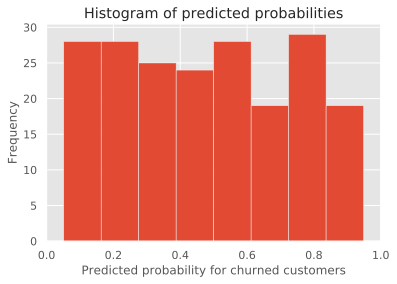

In [365]:
# histogram of predicted probabilities for churned customers
plt.hist(pred_prob_cl_one, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for churned customers')
plt.ylabel('Frequency')

**These are the probabilities that for churned and loyal customers.**

### 9.4)-ROC & AUC

In [0]:
from sklearn.metrics import roc_curve
roc_score=roc_curve(y_test, pred_prob_cl_one)

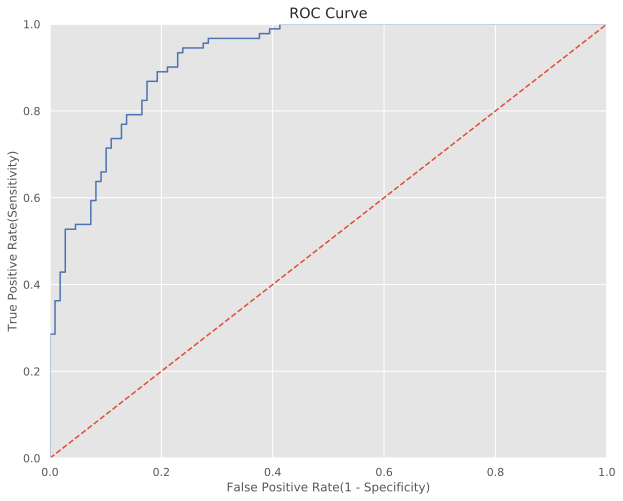

In [367]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, pred_prob_cl_one)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

In [368]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9209597741707833

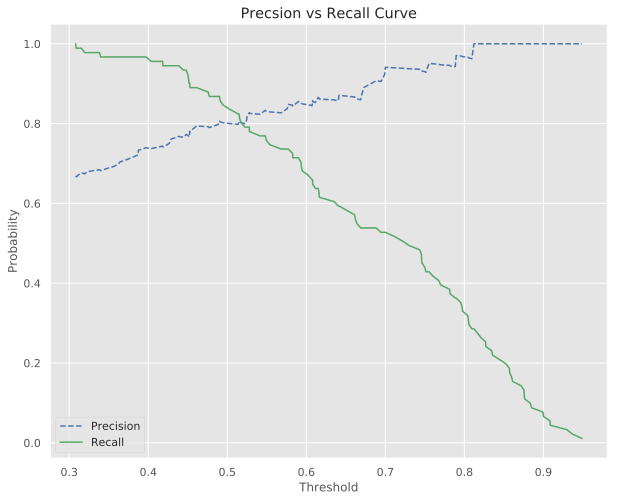

In [369]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl_one)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

Our threshold is almost at 0.5. If we go to lower values we can get better recall values. Higher values will improve precision but, recall will go very low. Model is still not giving best of result. But, this is better tha what we got. 

# 10)- Summary 
 We provide again summary of the most suitable and optimal model before submission

In [370]:
models = pd.DataFrame({
    'Model': ['Simple Logistic Model', 'Decison Tree', 'Support Vector Machine', 'Random Forest','Naive-Bayes','K-Nearest Neighbor','Dense Neural Net',
              'Simple Neural Network', 'Backpropagation NN',],
    'Recall-Score': [log_score, dt_score, svc_score, rf_score,nb_score,knn_score, keras_score,
                     NN_score, tf_score]})
models.sort_values(by='Recall-Score', ascending=False)

,Model,Recall-Score
3,Random Forest,0.858000
2,Support Vector Machine,0.791209
7,Simple Neural Network,0.791209
8,Backpropagation NN,0.780220
0,Simple Logistic Model,0.778396
6,Dense Neural Net,0.725275
4,Naive-Bayes,0.714286
5,K-Nearest Neighbor,0.692308
1,Decison Tree,0.637363


# 11)- Submission

cust-id, y_pred, pred_prob_c1-one 

In [0]:
df_pilot =pd.read_csv('Pilot_project.csv', encoding="ISO-8859-1")

In [372]:
df_pilot.head(2)

,Customer.ID,Total.Unique.Calls,Total.Call.centre.complaint.calls,Previous.provider,Customer.Age,Customer.Municipality,PricePhone,MonthlySubscriptionPrice,LoginsSite.Last.Month,LoginsSite.Last.6Months,PaidAfterPaymentDate,Years.customer,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Minutes.offnet,Minutes.onnet,Latitude,Longitude,Province,EndSubscription
0,ADF1345,308,2,TELE2,53,Zundert,267.980610,41.250999,7,9,5,3809,126.97,5390.9400,16,464885.6963,1871.879473,3519.060527,51.470702,4.662356,Noord-Brabant,24-3-2019
1,ADF1658,27,1,KPN,76,Eemsmond,305.727018,18.336615,7,16,3,165,5.50,1220.2872,7,396747.0527,997.283408,223.003792,53.400344,6.648410,Groningen,24-4-2019


In [373]:
#IDs of our customers
cust_id[:5]

0    ADF1345
1    ADF1658
2    ADF0063
3    ADF0047
4    ADF1348
Name: Customer.ID, dtype: object

In [0]:
df_pilot = df_pilot.drop(['Customer.ID','Customer.Municipality','Years.customer','Minutes.onnet','Minutes.offnet','Latitude','Longitude','LoginsSite.Last.6Months'], axis=1)

In [375]:
df_pilot.shape

(200, 14)

**we need to make same encoding and transformation on our pilot data as we did on our test data to apply our trained model**

In [0]:
# time series
year_sub_end=df_pilot['EndSubscription']
df_pilot['EndSubscription']=pd.to_datetime(year_sub_end)

In [0]:
df_pilot['EndSubscription']=df_pilot['EndSubscription'].dt.month

In [378]:
#missing values
summary_missing(df_pilot)

No. of fields:  200
No. of missing fields:  0


,No. of mising Value,%age of missing Value


In [379]:
#encoding
pd.get_dummies(df_pilot['Province']).iloc[:,1:].head()

,Flevoland,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [380]:
len(df_pilot['Province'].value_counts())

12

In [0]:
province_dummy=pd.get_dummies(df_pilot['Province'],prefix='Province').iloc[:,1:]
df_pilot=pd.concat([df_pilot,province_dummy],axis=1)

In [382]:
df_pilot.head(2)

,Total.Unique.Calls,Total.Call.centre.complaint.calls,Previous.provider,Customer.Age,PricePhone,MonthlySubscriptionPrice,LoginsSite.Last.Month,PaidAfterPaymentDate,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Province,EndSubscription,Province_Flevoland,Province_Friesland,Province_Gelderland,Province_Groningen,Province_Limburg,Province_Noord-Brabant,Province_Noord-Holland,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid-Holland
0,308,2,TELE2,53,267.980610,41.250999,7,5,126.97,5390.9400,16,464885.6963,Noord-Brabant,3,0,0,0,0,0,1,0,0,0,0,0
1,27,1,KPN,76,305.727018,18.336615,7,3,5.50,1220.2872,7,396747.0527,Groningen,4,0,0,0,1,0,0,0,0,0,0,0


In [383]:
df_pilot.shape

(200, 25)

In [0]:
df_pilot.drop(['Province'], axis=1, inplace=True)

In [385]:
df_pilot.shape

(200, 24)

In [386]:
len(df_pilot['Previous.provider'].value_counts())

7

In [387]:
pd.get_dummies(df_pilot['Previous.provider'],prefix='Previous.provider').iloc[:,1:]

,Previous.provider_Ben,Previous.provider_KPN,Previous.provider_T-Mobile,Previous.provider_TELE2,Previous.provider_Telfort,Previous.provider_Vodafone
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,1,0,0,0,0


In [0]:

provider_dummy=pd.get_dummies(df_pilot['Previous.provider'],prefix='Previous.provider').iloc[:,1:]
df_pilot=pd.concat([df_pilot,provider_dummy],axis=1)

In [389]:
df_pilot.shape

(200, 30)

In [0]:
df_pilot.drop(['Previous.provider'], axis=1, inplace=True)

In [391]:
df_pilot.shape

(200, 29)

In [392]:
df_pilot.columns

Index(['Total.Unique.Calls', 'Total.Call.centre.complaint.calls',
       'Customer.Age', 'PricePhone', 'MonthlySubscriptionPrice',
       'LoginsSite.Last.Month', 'PaidAfterPaymentDate', 'Months.customer',
       'Minutes.in.2018', 'Number.of.SMS', 'KBs.used', 'EndSubscription',
       'Province_Flevoland', 'Province_Friesland', 'Province_Gelderland',
       'Province_Groningen', 'Province_Limburg', 'Province_Noord-Brabant',
       'Province_Noord-Holland', 'Province_Overijssel', 'Province_Utrecht',
       'Province_Zeeland', 'Province_Zuid-Holland', 'Previous.provider_Ben',
       'Previous.provider_KPN', 'Previous.provider_T-Mobile',
       'Previous.provider_TELE2', 'Previous.provider_Telfort',
       'Previous.provider_Vodafone'],
      dtype='object')

In [0]:
# Scale for avoiding any outliers
pilot = StandardScaler().fit_transform(df_pilot)

In [394]:
type(pilot)

numpy.ndarray

In [396]:
# Fitting our model on X and y instead of X_train and y_train
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [397]:
pred_rf = rf.predict(pilot)
pred_rf[:5]

array([0, 0, 0, 0, 0])

In [398]:
rf.predict_proba(pilot)[0:10, :]

array([[0.6, 0.4],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.7, 0.3]])

In [399]:
# for churn class i.e class1 , we need to predict
rf.predict_proba(pilot)[:, 1]

array([0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.7, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3,
       0.3, 0.3, 0.3, 0.7, 0.3, 0.4, 0.4, 0.8, 0.4, 0.4, 0.8, 0.3, 0.3,
       0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.8,
       0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.4, 0.4, 0.8, 0.3, 0.4, 0.4, 0.3, 0.3, 0.4, 0.2, 0.2, 0.3,
       0.3, 0.2, 0.4, 0.3, 0.4, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.8,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2,
       0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3,
       0.7, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.4, 0.4, 0.3, 0.3, 0.9, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.2, 0.4, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.4, 0.3, 0.3, 0.9, 0.4,
       0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.4, 0.3,
       0.3, 0.3, 0.4, 0.4, 0.3, 0.2, 0.4, 0.7, 0.4, 0.8, 0.3, 0.3, 0.4,
       0.3, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.

In [400]:
# for loyal class i.e class0 , we need to predict
rf.predict_proba(pilot)[:, 0]

array([0.6, 0.7, 0.7, 0.6, 0.7, 0.7, 0.3, 0.8, 0.7, 0.7, 0.7, 0.6, 0.7,
       0.7, 0.7, 0.7, 0.3, 0.7, 0.6, 0.6, 0.2, 0.6, 0.6, 0.2, 0.7, 0.7,
       0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.7, 0.2,
       0.6, 0.6, 0.8, 0.7, 0.7, 0.7, 0.7, 0.6, 0.8, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.6, 0.6, 0.2, 0.7, 0.6, 0.6, 0.7, 0.7, 0.6, 0.8, 0.8, 0.7,
       0.7, 0.8, 0.6, 0.7, 0.6, 0.6, 0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.2,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8,
       0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.7,
       0.3, 0.7, 0.7, 0.7, 0.8, 0.7, 0.7, 0.6, 0.6, 0.7, 0.7, 0.1, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.7, 0.8, 0.7, 0.8, 0.6, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.6, 0.7, 0.6, 0.7, 0.6, 0.7, 0.7, 0.1, 0.6,
       0.8, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.7, 0.6, 0.7,
       0.7, 0.7, 0.6, 0.6, 0.7, 0.8, 0.6, 0.3, 0.6, 0.2, 0.7, 0.7, 0.6,
       0.7, 0.7, 0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.

In [0]:
# Since we are asked to submit for churned class i.e leaving customers
pred_prob_cl1=rf.predict_proba(pilot)[:, 1]

### time to submit results

In [0]:
submission = pd.DataFrame({
        "Customer_Id": cust_id,
        "Customer_leave_or_not ": pred_rf,
        "Churn_Probability":pred_prob_cl1
    })
submission.to_csv('submission.csv', index=False)

In [403]:
df_submit =pd.read_csv('submission.csv')
df_submit.head()

,Customer_Id,Customer_leave_or_not,Churn_Probability
0,ADF1345,0,0.4
1,ADF1658,0,0.3
2,ADF0063,0,0.3
3,ADF0047,0,0.4
4,ADF1348,0,0.3


**So, there is our result. I hope you had fun reading this notebook as much as I had while making this.**

Thank you